In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Setting untuk membuat angka mudah dibaca di display
pd.options.display.float_format = '{:20.2f}'.format

# Menampilkan semua kolom pada output
pd.set_option('display.max_columns', None)

# Data Exploration

In [67]:
df = pd.read_excel("../data/online_retail_II.xlsx", sheet_name=0) # sheet name buat ngebaca bab 1 aja (file asli excel ada 2 bab yaitu 2009-2010 dan 2010-2011)

df.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.00,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.00,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.00,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.00,United Kingdom


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [69]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,525461.00,525461,525461.00,417534.00
mean,10.34,2010-06-28 11:37:36.845017856,4.69,15360.65
min,-9600.00,2009-12-01 07:45:00,-53594.36,12346.00
25%,1.00,2010-03-21 12:20:00,1.25,13983.00
50%,3.00,2010-07-06 09:51:00,2.10,15311.00
75%,10.00,2010-10-15 12:45:00,4.21,16799.00
max,19152.00,2010-12-09 20:01:00,25111.09,18287.00
std,107.42,NaN,146.13,1680.81


Berdasarkan gambaran besar yang kita lakukan disini, ada beberapa hal yang bikin janggal:

- Nilai min pada `Quantity` bernilai negatif yang dimana itu cukup aneh untuk sekilas, karena kita berekspektasi untuk positif

- Nilai min pada `Price` juga bernilai negatif

- Jumlah `Customer ID` yang jumlahnya kurang dibandingkan dengan kolom lainnya

Kita akan investigasi itu kedepannya

In [70]:
df.describe(include='O') # Mendapatkan deskripsi untuk objek data type (string)

,Invoice,StockCode,Description,Country
count,525461,525461,522533,525461
unique,28816,4632,4681,40
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,675,3516,3549,485852


In [71]:
df[df['Customer ID'].isna()].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
578,489525,85227,SET/6 3D KIT CARDS FOR KIDS,1,2009-12-01 11:49:00,0.85,NaN,United Kingdom
1055,489548,22271,FELTCRAFT DOLL ROSIE,1,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1056,489548,22254,FELT TOADSTOOL LARGE,12,2009-12-01 12:32:00,1.25,NaN,United Kingdom
1057,489548,22273,FELTCRAFT DOLL MOLLY,3,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1058,489548,22195,LARGE HEART MEASURING SPOONS,1,2009-12-01 12:32:00,1.65,NaN,United Kingdom


Hmm, kalau diliat liat, pada tabel tersebut, untuk data pertama hingga ke empat keliatan aneh sekali. Disitu `Price` = 0 dan `Quantity` bernilai negatif. Lalu beberapa data meskipun disitu keliatan ada `Description` yang legit, namun kita tidak bisa secara effective mengetahui siapa `Customer ID` yang membeli ini. 

Kemungkinan besar strategi kita saat ini adalah untuk menghapus `Customer ID` yang hilang/kosong

In [72]:
df[df["Quantity"]< 0].head(10) # Penasaran dengan apa sih nilai negatif pada data ini

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.00,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.00,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.00,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
183,C489449,21871,SAVE THE PLANET MUG,-12,2009-12-01 10:33:00,1.25,16321.00,Australia
184,C489449,84946,ANTIQUE SILVER TEA GLASS ETCHED,-12,2009-12-01 10:33:00,1.25,16321.00,Australia
185,C489449,84970S,HANGING HEART ZINC T-LIGHT HOLDER,-24,2009-12-01 10:33:00,0.85,16321.00,Australia
186,C489449,22090,PAPER BUNTING RETRO SPOTS,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
196,C489459,90200A,PURPLE SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.25,17592.00,United Kingdom


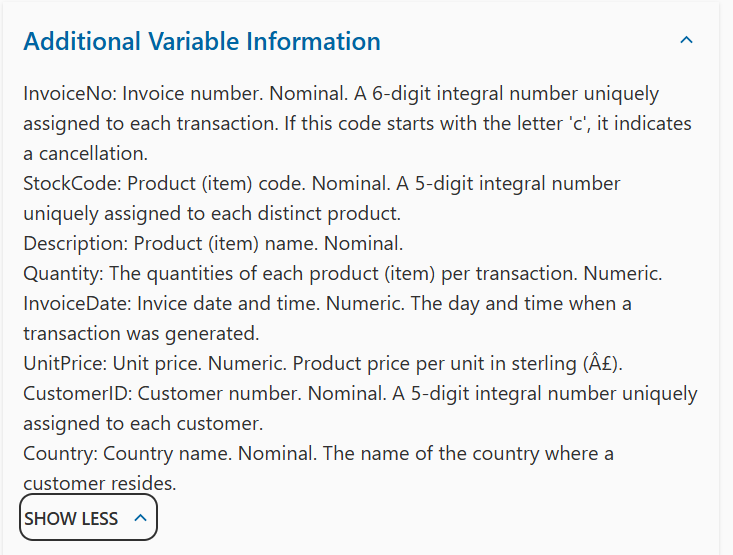
> Ternyata kalau kita lihat deskripsi pada data asli ini, maka dapat diketahui bahwa kode unik C berarti Cancellation

Cukup menarik untuk di tinjau lebih lanjut

In [73]:
df["Invoice"] = df["Invoice"].astype("str")
df[df["Invoice"].str.match("^\\d{6}$") == False] # Maksud kodingan ini adalah, kita ingin "matching", jadi kita ingin dalam kasus ini, data kolom Invoice hanya menampilkan 6digit saja tanpa lebih tanpa kurang. Bener bener digit sebanyak 6 karakter. Nah karena False berarti selain itu

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.00,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.00,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.00,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
...,...,...,...,...,...,...,...,...
524695,C538123,22956,36 FOIL HEART CAKE CASES,-2,2010-12-09 15:41:00,2.10,12605.00,Germany
524696,C538124,M,Manual,-4,2010-12-09 15:43:00,0.50,15329.00,United Kingdom
524697,C538124,22699,ROSES REGENCY TEACUP AND SAUCER,-1,2010-12-09 15:43:00,2.95,15329.00,United Kingdom
524698,C538124,22423,REGENCY CAKESTAND 3 TIER,-1,2010-12-09 15:43:00,12.75,15329.00,United Kingdom


In [74]:
df["Invoice"].str.replace("[0-9]", "", regex=True).unique() # Maksudnya yaitu "Tolong hapus semua ANGKA di kolom Invoice, lalu tunjukkan sisa HURUF/SIMBOL apa saja yang tertinggal." / Regex itu pencarian berdasarkan pola yaa

array(['', 'C', 'A'], dtype=object)

In [75]:
df[df["Invoice"].str.startswith("A")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom


Aman untuk dibersihkan sajaa, karena dari deskripsi nya dan juga harganyaa tidak masuk akal

Tapi ini maksudnyaa apaa?? 

di dunia bisnis/akuntansi, ini adalah hal yang sangat nyata dan penting.

Nama resminya di dunia nyata (Akuntansi/Bisnis) adalah **"Bad Debt Write-off"** atau dalam bahasa Indonesia **"Penghapusan Piutang Tak Tertagih"**.

### Cerita Kasus "Bad Debt"

1.  **Awal Cerita:**
    Toko mengirim barang ke pembeli besar. Karena langganan, pembeli bilang "Kirim dulu, nanti aku bayar bulan depan". Toko mencatat ini sebagai **Pendapatan (Sales)** sebesar misal £50.000.

2.  **Masalah:**
    Bulan depan datang, si pembeli tidak bayar. Bulan depannya lagi, ditagih susah. Ternyata pembelinya bangkrut atau kabur.

3.  **Realita:**
    Uang £50.000 itu **tidak akan pernah diterima** oleh toko.

4.  **Solusi Akuntansi (Adjust Bad Debt):**
    Toko tidak boleh membiarkan catatan "Pendapatan £50.000" itu ada di buku, karena nanti toko harus bayar pajak atas uang yang tidak pernah mereka terima.
    
    Makanya, bagian keuangan membuat **entri manual** (seperti yang kamu lihat di data itu):
    *   **Description:** "Adjust bad debt" (Koreksi utang macet).
    *   **Price:** Dibuat **Negatif** (misal -53594.36) untuk "membatalkan" atau "mengurangi" total pendapatan toko secara keseluruhan.
    *   **StockCode 'B':** Kemungkinan kode manual untuk 'Bad Debt'.

### Kenapa datanya aneh?
*   **Quantity 1 tapi Harga Minus:** Ini cuma cara orang keuangan memasukkan data ke sistem. Mereka butuh satu baris transaksi (Qty 1) yang nilainya minus besar untuk menyeimbangkan pembukuan.
*   **Customer ID NaN:** Karena ini seringkali tindakan "pembersihan buku" di akhir bulan/tahun oleh akuntan, mereka mungkin tidak memasukkannya ke akun customer spesifik, tapi sebagai kerugian umum toko.

**Kesimpulan:**
Itu adalah catatan **Kerugian Toko** akibat di-PHP-in (tidak dibayar) oleh pembeli yang utangnya macet.

In [76]:
df["StockCode"] = df["StockCode"].astype("str")
df[(df["StockCode"].str.match("^\\d{5}$") == False)] #buang yang Barang Normal (5 angka) aja. Sisanya tampilin semua.

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
12,489436,48173C,DOOR MAT BLACK FLOCK,10,2009-12-01 09:06:00,5.95,13078.00,United Kingdom
23,489436,35004B,SET OF 3 BLACK FLYING DUCKS,12,2009-12-01 09:06:00,4.65,13078.00,United Kingdom
28,489436,84596F,SMALL MARSHMALLOWS PINK BOWL,8,2009-12-01 09:06:00,1.25,13078.00,United Kingdom
...,...,...,...,...,...,...,...,...
525387,538170,84029E,RED WOOLLY HOTTIE WHITE HEART.,2,2010-12-09 19:32:00,3.75,13969.00,United Kingdom
525388,538170,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,2,2010-12-09 19:32:00,3.75,13969.00,United Kingdom
525389,538170,85232B,SET OF 3 BABUSHKA STACKING TINS,2,2010-12-09 19:32:00,4.95,13969.00,United Kingdom
525435,538171,47591D,PINK FAIRY CAKE CHILDRENS APRON,1,2010-12-09 20:01:00,1.95,17530.00,United Kingdom


> StockCode: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product. 

itu adalah katanya deskripsi yang disediakan oleh distributor, sehingga disini ada tidak kecocokan dengan dokumentasi data. Namun kalau dicek, sepertinya ini aman aman aja deh, tapi perlu untuk dicek lebih dalam


In [77]:
df[(df["StockCode"].str.match("^\\d{5}$") == False) & (df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$") == False)] # buang Barang Normal (5 angka), DAN  buang juga Barang Variasi (5 angka + huruf).


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
89,489439,POST,POSTAGE,3,2009-12-01 09:28:00,18.00,12682.00,France
126,489444,POST,POSTAGE,1,2009-12-01 09:55:00,141.00,12636.00,USA
173,489447,POST,POSTAGE,1,2009-12-01 10:10:00,130.00,12362.00,Belgium
625,489526,POST,POSTAGE,6,2009-12-01 11:50:00,18.00,12533.00,Germany
735,C489535,D,Discount,-1,2009-12-01 12:11:00,9.00,15299.00,United Kingdom
...,...,...,...,...,...,...,...,...
524776,538147,M,Manual,1,2010-12-09 16:11:00,15.00,13090.00,United Kingdom
524887,538148,DOT,DOTCOM POSTAGE,1,2010-12-09 16:26:00,547.32,NaN,United Kingdom
525000,538149,DOT,DOTCOM POSTAGE,1,2010-12-09 16:27:00,620.68,NaN,United Kingdom
525126,538153,DOT,DOTCOM POSTAGE,1,2010-12-09 16:31:00,822.94,NaN,United Kingdom


In [78]:
df[(df["StockCode"].str.match("^\\d{5}$") == False) & (df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$") == False)]["StockCode"].unique()


array(['POST', 'D', 'DCGS0058', 'DCGS0068', 'DOT', 'M', 'DCGS0004',
       'DCGS0076', 'C2', 'BANK CHARGES', 'DCGS0003', 'TEST001',
       'gift_0001_80', 'DCGS0072', 'gift_0001_20', 'DCGS0044', 'TEST002',
       'gift_0001_10', 'gift_0001_50', 'DCGS0066N', 'gift_0001_30',
       'PADS', 'ADJUST', 'gift_0001_40', 'gift_0001_60', 'gift_0001_70',
       'gift_0001_90', 'DCGSSGIRL', 'DCGS0006', 'DCGS0016', 'DCGS0027',
       'DCGS0036', 'DCGS0039', 'DCGS0060', 'DCGS0056', 'DCGS0059', 'GIFT',
       'DCGSLBOY', 'm', 'DCGS0053', 'DCGS0062', 'DCGS0037', 'DCGSSBOY',
       'DCGSLGIRL', 'S', 'DCGS0069', 'DCGS0070', 'DCGS0075', 'B',
       'DCGS0041', 'ADJUST2', '47503J ', 'C3', 'SP1002', 'AMAZONFEE'],
      dtype=object)

In [79]:
df[df["StockCode"].str.contains("DOT")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
2379,489597,DOT,DOTCOM POSTAGE,1,2009-12-01 14:28:00,647.19,NaN,United Kingdom
2539,489600,DOT,DOTCOM POSTAGE,1,2009-12-01 14:43:00,55.96,NaN,United Kingdom
2551,489601,DOT,DOTCOM POSTAGE,1,2009-12-01 14:44:00,68.39,NaN,United Kingdom
2571,489602,DOT,DOTCOM POSTAGE,1,2009-12-01 14:45:00,59.35,NaN,United Kingdom
2619,489603,DOT,DOTCOM POSTAGE,1,2009-12-01 14:46:00,42.39,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
524272,538071,DOT,DOTCOM POSTAGE,1,2010-12-09 14:09:00,885.94,NaN,United Kingdom
524887,538148,DOT,DOTCOM POSTAGE,1,2010-12-09 16:26:00,547.32,NaN,United Kingdom
525000,538149,DOT,DOTCOM POSTAGE,1,2010-12-09 16:27:00,620.68,NaN,United Kingdom
525126,538153,DOT,DOTCOM POSTAGE,1,2010-12-09 16:31:00,822.94,NaN,United Kingdom


In [80]:
# Simpan kode-kode aneh tadi ke dalam variabel biar gampang
kode_aneh = df[(df["StockCode"].str.match("^\\d{5}$") == False) & (df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$") == False)]["StockCode"].unique()

# Kita filter data cuma yang kodenya aneh, lalu kita lihat Description-nya
# .value_counts() biar sekalian tau mana yang paling sering muncul
df[df["StockCode"].isin(kode_aneh)].groupby(["StockCode", "Description"]).size().reset_index(name='Jumlah Muncul').sort_values(by='Jumlah Muncul', ascending=False)

,StockCode,Description,Jumlah Muncul
32,POST,POSTAGE,862
30,M,Manual,850
29,DOT,DOTCOM POSTAGE,735
9,C2,CARRIAGE,136
10,D,Discount,100
8,BANK CHARGES,Bank Charges,59
33,S,SAMPLES,41
2,ADJUST,Adjustment by john on 26/01/2010 16,38
16,DCGS0058,MISO PRETTY GUM,30
3,ADJUST,Adjustment by john on 26/01/2010 17,26


In [81]:
# Kodingan ini murni dari ai, saya hanya menyuruh dia untuk membuat kodingan agar bisa memberikan output yang saya inginkan.

# 1. Ambil lagi daftar kode aneh tadi
kode_aneh = df[(df["StockCode"].str.match("^\\d{5}$") == False) & (df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$") == False)]["StockCode"].unique()

# 2. Filter data cuma yang kode aneh
df_aneh = df[df["StockCode"].isin(kode_aneh)]

# 3. Kita Groupby untuk menghitung statistik Customer ID-nya
cek_customer = df_aneh.groupby("StockCode").agg(
    Total_Transaksi=('Invoice', 'count'),          # Hitung total baris
    Ada_CustomerID=('Customer ID', 'count'),       # Hitung yang ID-nya TIDAK NaN
    CustomerID_NaN=('Customer ID', lambda x: x.isna().sum()) # Hitung yang ID-nya NaN
).sort_values(by='Total_Transaksi', ascending=False)

# Tampilkan
cek_customer

,Total_Transaksi,Ada_CustomerID,CustomerID_NaN
StockCode,,,
POST,865,822,43
M,850,650,200
DOT,736,0,736
C2,138,125,13
D,100,97,3
ADJUST,67,61,6
BANK CHARGES,65,26,39
S,41,0,41
DCGS0058,31,0,31


In [82]:
# Daftar kode yang bikin kamu penasaran
kode_penasaran = ['POST', 'M', 'DOT', 'C2', 'D', 'ADJUST', 'BANK CHARGES', 'S', 'DCGS0058']

# Loop untuk cek satu per satu
for kode in kode_penasaran:
    print(f"==================================================")
    print(f"👀 MENGINTIP ISI STOCK CODE: {kode}")
    print(f"==================================================")
    
    # Ambil data yang stockcode-nya sesuai
    data_intip = df[df['StockCode'] == kode]
    
    # Tampilkan 10 baris pertama saja biar gak penuh layarnya
    display(data_intip.head(10))
    
    # Kasih jarak enter biar enak bacanya
    print("\n")

👀 MENGINTIP ISI STOCK CODE: POST


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
89,489439,POST,POSTAGE,3,2009-12-01 09:28:00,18.00,12682.00,France
126,489444,POST,POSTAGE,1,2009-12-01 09:55:00,141.00,12636.00,USA
173,489447,POST,POSTAGE,1,2009-12-01 10:10:00,130.00,12362.00,Belgium
625,489526,POST,POSTAGE,6,2009-12-01 11:50:00,18.00,12533.00,Germany
927,C489538,POST,POSTAGE,-1,2009-12-01 12:18:00,9.58,15796.00,United Kingdom
1244,489557,POST,POSTAGE,4,2009-12-01 12:52:00,18.00,12490.00,France
3451,C489685,POST,POSTAGE,-1,2009-12-02 10:28:00,18.00,12523.00,France
6406,489883,POST,POSTAGE,3,2009-12-02 16:24:00,18.00,12437.00,France
9103,C490117,POST,POSTAGE,-1,2009-12-03 17:38:00,2.99,16570.00,United Kingdom
9153,C490120,POST,POSTAGE,-2,2009-12-03 17:52:00,18.00,14277.00,France




👀 MENGINTIP ISI STOCK CODE: M


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
2697,489609,M,Manual,1,2009-12-01 14:50:00,4.00,NaN,United Kingdom
3053,C489651,M,Manual,-1,2009-12-01 16:48:00,5.10,17804.00,United Kingdom
5897,C489859,M,Manual,-1,2009-12-02 14:45:00,69.57,NaN,United Kingdom
9259,C490126,M,Manual,-1,2009-12-03 18:12:00,5.95,15884.00,United Kingdom
9307,C490129,M,Manual,-1,2009-12-03 18:26:00,1998.49,15482.00,United Kingdom
11310,490300,M,Manual,1,2009-12-04 14:19:00,0.85,12970.00,United Kingdom
11311,490300,M,Manual,1,2009-12-04 14:19:00,0.21,12970.00,United Kingdom
16107,490727,M,Manual,1,2009-12-07 16:38:00,0.00,17231.00,United Kingdom
17273,C490748,M,Manual,-1,2009-12-07 18:14:00,309.73,12748.00,United Kingdom
17386,490760,M,Manual,1,2009-12-08 09:49:00,10.00,14295.00,United Kingdom




👀 MENGINTIP ISI STOCK CODE: DOT


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
2379,489597,DOT,DOTCOM POSTAGE,1,2009-12-01 14:28:00,647.19,NaN,United Kingdom
2539,489600,DOT,DOTCOM POSTAGE,1,2009-12-01 14:43:00,55.96,NaN,United Kingdom
2551,489601,DOT,DOTCOM POSTAGE,1,2009-12-01 14:44:00,68.39,NaN,United Kingdom
2571,489602,DOT,DOTCOM POSTAGE,1,2009-12-01 14:45:00,59.35,NaN,United Kingdom
2619,489603,DOT,DOTCOM POSTAGE,1,2009-12-01 14:46:00,42.39,NaN,United Kingdom
2644,489604,DOT,DOTCOM POSTAGE,1,2009-12-01 14:47:00,50.87,NaN,United Kingdom
2686,489607,DOT,DOTCOM POSTAGE,1,2009-12-01 14:49:00,76.30,NaN,United Kingdom
2698,489609,DOT,DOTCOM POSTAGE,1,2009-12-01 14:50:00,74.61,NaN,United Kingdom
2771,489612,DOT,DOTCOM POSTAGE,1,2009-12-01 14:55:00,87.39,NaN,United Kingdom
2806,489614,DOT,DOTCOM POSTAGE,1,2009-12-01 14:56:00,80.30,NaN,United Kingdom




👀 MENGINTIP ISI STOCK CODE: C2


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
9292,490127,C2,CARRIAGE,1,2009-12-03 18:13:00,50.00,14156.00,EIRE
14481,490541,C2,CARRIAGE,1,2009-12-07 09:25:00,50.00,NaN,EIRE
14502,490542,C2,CARRIAGE,1,2009-12-07 09:42:00,50.00,14911.00,EIRE
19541,490998,C2,CARRIAGE,1,2009-12-08 17:24:00,50.00,16253.00,United Kingdom
22803,491160,C2,CARRIAGE,1,2009-12-10 10:29:00,50.00,14911.00,EIRE
27494,491702,C2,CARRIAGE,1,2009-12-13 13:53:00,50.00,NaN,EIRE
32207,491990,C2,NaN,100,2009-12-15 10:06:00,0.00,NaN,United Kingdom
32964,492092,C2,CARRIAGE,1,2009-12-15 14:03:00,50.00,14156.00,EIRE
34330,492250,C2,CARRIAGE,1,2009-12-16 10:45:00,50.00,18286.00,United Kingdom
39877,492746,C2,CARRIAGE,1,2009-12-18 13:01:00,50.00,NaN,EIRE




👀 MENGINTIP ISI STOCK CODE: D


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
735,C489535,D,Discount,-1,2009-12-01 12:11:00,9.00,15299.00,United Kingdom
736,C489535,D,Discount,-1,2009-12-01 12:11:00,19.00,15299.00,United Kingdom
24675,C491428,D,Discount,-1,2009-12-10 20:23:00,9.10,15494.00,United Kingdom
29414,C491845,D,Discount,-1,2009-12-14 14:54:00,1.59,NaN,United Kingdom
29958,C491962,D,Discount,-1,2009-12-14 16:38:00,0.59,13206.00,United Kingdom
39127,C492693,D,Discount,-1,2009-12-17 18:47:00,6.85,13408.00,United Kingdom
44782,C493373,D,Discount,-1,2009-12-23 11:22:00,64.37,15044.00,United Kingdom
62231,C494909,D,Discount,-30,2010-01-19 16:45:00,0.40,12931.00,United Kingdom
62232,C494909,D,Discount,-30,2010-01-19 16:45:00,0.13,12931.00,United Kingdom
62962,C494984,D,Discount,-1,2010-01-20 11:12:00,70.00,17949.00,United Kingdom




👀 MENGINTIP ISI STOCK CODE: ADJUST


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
70975,495732,ADJUST,Adjustment by john on 26/01/2010 16,1,2010-01-26 16:20:00,96.46,NaN,EIRE
70976,495733,ADJUST,Adjustment by john on 26/01/2010 16,1,2010-01-26 16:21:00,68.34,14911.00,EIRE
70977,495735,ADJUST,Adjustment by john on 26/01/2010 16,1,2010-01-26 16:22:00,201.56,12745.00,EIRE
70978,495734,ADJUST,Adjustment by john on 26/01/2010 16,1,2010-01-26 16:22:00,205.82,14911.00,EIRE
70979,C495737,ADJUST,Adjustment by john on 26/01/2010 16,-1,2010-01-26 16:23:00,10.50,16154.00,United Kingdom
70980,495736,ADJUST,Adjustment by john on 26/01/2010 16,1,2010-01-26 16:23:00,21.00,12606.00,Spain
70981,C495740,ADJUST,Adjustment by john on 26/01/2010 16,-1,2010-01-26 16:24:00,14.00,13054.00,United Kingdom
70982,C495738,ADJUST,Adjustment by john on 26/01/2010 16,-1,2010-01-26 16:24:00,26.25,12454.00,Spain
70983,C495739,ADJUST,Adjustment by john on 26/01/2010 16,-1,2010-01-26 16:24:00,10.50,15383.00,United Kingdom
70984,C495744,ADJUST,Adjustment by john on 26/01/2010 16,-1,2010-01-26 16:25:00,91.89,12706.00,Finland




👀 MENGINTIP ISI STOCK CODE: BANK CHARGES


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
18410,C490943,BANK CHARGES,Bank Charges,-1,2009-12-08 14:08:00,15.00,16703.00,United Kingdom
18466,490948,BANK CHARGES,Bank Charges,1,2009-12-08 14:29:00,15.00,16805.00,United Kingdom
33435,C492206,BANK CHARGES,Bank Charges,-1,2009-12-15 16:32:00,848.43,NaN,United Kingdom
55948,C494438,BANK CHARGES,Bank Charges,-1,2010-01-14 12:15:00,767.99,NaN,United Kingdom
94431,498269,BANK CHARGES,Bank Charges,1,2010-02-17 15:03:00,15.00,16928.00,United Kingdom
104220,C499374,BANK CHARGES,Bank Charges,-1,2010-02-26 11:55:00,467.54,NaN,United Kingdom
114180,C500319,BANK CHARGES,Bank Charges,-11,2010-03-07 12:02:00,0.96,NaN,United Kingdom
115208,C500352,BANK CHARGES,Bank Charges,-1,2010-03-07 15:08:00,11.29,NaN,United Kingdom
118558,C500708,BANK CHARGES,Bank Charges,-1,2010-03-09 13:56:00,372.30,NaN,United Kingdom
136411,C502459,BANK CHARGES,Bank Charges,-1,2010-03-24 14:25:00,39.24,NaN,United Kingdom




👀 MENGINTIP ISI STOCK CODE: S


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
114061,C500305,S,SAMPLES,-1,2010-03-07 10:59:00,73.80,NaN,United Kingdom
114083,C500309,S,SAMPLES,-1,2010-03-07 11:09:00,32.03,NaN,United Kingdom
133558,C502083,S,SAMPLES,-1,2010-03-22 15:50:00,170.37,NaN,United Kingdom
133582,C502088,S,SAMPLES,-1,2010-03-22 16:03:00,259.59,NaN,United Kingdom
136253,C502438,S,SAMPLES,-1,2010-03-24 13:11:00,605.18,NaN,United Kingdom
136259,C502442,S,SAMPLES,-1,2010-03-24 13:20:00,94.19,NaN,United Kingdom
181508,506601,S,SAMPLES,1,2010-04-30 14:49:00,73.80,NaN,United Kingdom
181509,C506602,S,SAMPLES,-1,2010-04-30 14:56:00,3.84,NaN,United Kingdom
181510,C506602,S,SAMPLES,-1,2010-04-30 14:56:00,3.55,NaN,United Kingdom
181511,C506602,S,SAMPLES,-1,2010-04-30 14:56:00,77.00,NaN,United Kingdom




👀 MENGINTIP ISI STOCK CODE: DCGS0058


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
2377,489597,DCGS0058,MISO PRETTY GUM,1,2009-12-01 14:28:00,0.83,NaN,United Kingdom
8372,490074,DCGS0058,MISO PRETTY GUM,1,2009-12-03 14:39:00,0.83,NaN,United Kingdom
17264,490745,DCGS0058,MISO PRETTY GUM,1,2009-12-07 18:02:00,0.83,NaN,United Kingdom
30671,491969,DCGS0058,MISO PRETTY GUM,1,2009-12-14 17:57:00,0.83,NaN,United Kingdom
31652,491970,DCGS0058,MISO PRETTY GUM,1,2009-12-14 18:03:00,0.83,NaN,United Kingdom
32045,491971,DCGS0058,MISO PRETTY GUM,2,2009-12-14 18:37:00,0.83,NaN,United Kingdom
34668,492303,DCGS0058,MISO PRETTY GUM,1,2009-12-16 11:57:00,0.83,NaN,United Kingdom
37222,492425,DCGS0058,MISO PRETTY GUM,1,2009-12-16 17:58:00,0.83,NaN,United Kingdom
40878,492782,DCGS0058,MISO PRETTY GUM,1,2009-12-18 17:06:00,0.83,NaN,United Kingdom
41260,492783,DCGS0058,MISO PRETTY GUM,2,2009-12-18 17:15:00,0.83,NaN,United Kingdom


### Stock Code

* StockCode is meant to follow the pattern `[0-9]{5}` but seems to have legit values for `[0-9]{5}[a-zA-Z]+`
    * Also contains other values:

| Code | Description | Action |
| :--- | :--- | :--- |
| **DCGS** | Looks valid, some quantities are negative though and customer ID is null | Exclude from clustering |
| **D** | Looks valid, represents discount values | Exclude from clustering |
| **DOT** | Looks valid, represents postage charges | Exclude from clustering |
| **M or m** | Looks valid, represents manual transactions | Exclude from clustering |
| **C2** | Carriage transaction - not sure what this means | Exclude from clustering |
| **C3** | Not sure, only 1 transaction | Exclude |
| **BANK CHARGES or B** | Bank charges | Exclude from clustering |
| **S** | Samples sent to customer | Exclude from clustering |
| **TESTXXX** | Testing data, not valid | Exclude from clustering |
| **gift_XXX** | Purchases with gift cards, might be interesting for another analysis, but no customer data | Exclude |
| **PADS** | Looks like a legit stock code for padding | **Include** |
| **SP1002** | Looks like a special request item, only 2 transactions, 3 look legit, 1 has 0 pricing | Exclude for now |
| **AMAZONFEE** | Looks like fees for Amazon shipping or something | Exclude for now |
| **ADJUSTX** | Looks like manual account adjustments by admins | Exclude for now |

Kenapa kok bisa seperti itu? Pada dasar apa kita menghapus atau tetap memasukan suatu kategori? 

Kembali ke tujuan utama kita pada sesi ini, yaitu : **Customer Segmentation**, kita ingin mengelompokkan orang berdasarkan **"Barang apa yang mereka suka beli"** dan **"Seberapa loyal mereka belanja barang dagangan kita"

Alasan lebih detailnya dibawah ini : 

1. Kategori "Bukan Barang Dagangan" (Ini termasuk Jasa/Logistik)
   - **Kode** `Dot` (Postage / Ongkos Kirim), `C2` (Carriage), `AMAZONFEE`
   - **Alasan Diubuang**:
     - Ini adalah biaya kirim atau biaya admin platform, yang berarti tidak ada kaitannya dengan apa yang ingin kita capai. Contoh: Kalau customer rumahnya jauh, akan menghabiskan lebih banyak uang dibandingkan dengan orang yang beli langsung. Sistem nantinya akan menganggap bahwa si customer yang alamatnya jauh ini lebih "Sultan" (Monetary tinggi). Padahal bisa saja dia beli barangnya sedikit, sedangkan yang beli langsung beli barangnya cukup banyak namun kalah secara jumlah uang yang dikeluarkan karena biaya ongkir itu tadi.
       
2. Kategori Admin/Akuntansi

    - Kode: `M` `m` (Manual), `D` (Discount), `BANK CHARGES`, `ADJUST`.
    - **Alasan Diubuang**:
      - Untuk kode `M` `m` kita tidak bisa tau barang apa yang dibeli, sehingga akan bisa menjadi "sampah" bagi data latih kita. Begitu pula dengan `BANK CHARGES` yang merupakan pemberian otomatis dari Bank bersangkutan yang tidak memiliki arti apa-apa.

Sisanyaa sudah cukup intuitive untuk diketahui mengapa perlu dihapus. Pengecualian saja untuk 

3. Kenapa `PADS` Dimasukkan (Include)?
   - Kode: PADS
   - Deskripsi: PADS TO MATCH ALL CUSHIONS.
   - Alasan Disimpan:
     - Nah, ini pengecualian unik! Walaupun kodenya aneh (huruf semua), tapi kalau dilihat deskripsinya, ini adalah Barang Fisik (Busa/Bantalan Kursi). Ini adalah produk jualan beneran yang dipilih dan dibeli customer. Jadi ini VALID mencerminkan perilaku belanja.


### Kesimpulan Strategi Si Trent (dan Kita):
Dia ingin membersihkan dataset supaya hanya menyisakan **TRANSAKSI PRODUK FISIK YANG VALID**.

Dengan begitu, nanti saat algoritma K-Means bekerja:
*   Klaster 1 = Orang yang suka beli pernak-pernik kecil.
*   Klaster 2 = Orang yang suka borong barang mahal.

Bukan jadi:
*   Klaster 1 = Orang yang rumahnya jauh (Ongkir mahal).
*   Klaster 2 = Orang yang sering kena denda Bank.

# Data Cleaning

In [83]:
cleaned_df = df.copy()

In [84]:
cleaned_df["Invoice"] = cleaned_df["Invoice"].astype("str")

mask = (
    cleaned_df["Invoice"].str.match("^\\d{6}$") == True
)

cleaned_df= cleaned_df[mask]
cleaned_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.00,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.00,United Kingdom


Kode ini berfungsi untuk membuang semua transaksi Aneh (termasuk "C" alias Cancellation dan "A" alias Bad Debt) dan hanya menyisakan transaksi Normal (Sesuai dengan deskripsi dokumentasi).

In [85]:
cleaned_df["StockCode"] = cleaned_df["StockCode"].astype("str")

mask = (
    (cleaned_df["StockCode"].str.match("^\\d{5}") == True) 
    | (cleaned_df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$") == True)
    | (cleaned_df["StockCode"].str.match("PADS") == True)
)

cleaned_df= cleaned_df[mask]
cleaned_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.00,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.00,United Kingdom


In [86]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,512797.00,512797,512797.00,406337.00
mean,11.00,2010-06-28 18:26:53.830657792,3.39,15373.63
min,-9600.00,2009-12-01 07:45:00,0.00,12346.00
25%,1.00,2010-03-21 13:27:00,1.25,14004.00
50%,3.00,2010-07-06 14:25:00,2.10,15326.00
75%,10.00,2010-10-15 14:50:00,4.21,16814.00
max,19152.00,2010-12-09 20:01:00,1157.15,18287.00
std,104.35,NaN,5.07,1677.37


Oke, ini adalah **Filter Tahap 2**, khusus untuk membersihkan kolom **StockCode** (Kode Barang).

Tujuannya: Membuang "sampah" seperti `POST`, `DOT`, `M`, `BANK CHARGES` yang tadi sudah kita diskusikan panjang lebar.

Mari kita bedah **3 Syarat Sakti** di dalam kode mask itu. Logikanya pakai **OR (`|`)**, artinya: *"Kalau memenuhi SALAH SATU syarat ini, boleh masuk (disimpan)."*

---

### Bedah Syarat (Yang Disimpan)

1.  **`^\\d{5}`** (Angka 5 Digit di depan)
    *   **Maksud:** Kode barang standar/normal.
    *   **Contoh Disimpan:** `85048`, `22041`.
    *   *Note: Di regex ini dia cuma cek depannya 5 angka, belakangnya bebas. Tapi biasanya kode murni 5 angka masuk sini.*

2.  **`^\\d{5}[a-zA-Z]+$`** (5 Angka + Huruf)
    *   **Maksud:** Kode barang variasi warna/tipe.
    *   **Contoh Disimpan:** `79323P` (Pink), `79323W` (White), `85123A`.

3.  **`PADS`** (Spesifik kata "PADS")
    *   **Maksud:** Pengecualian unik yang tadi kita sepakati (Busa Kursi).
    *   **Contoh Disimpan:** `PADS`.

---

### Siapa yang Terbuang? (Contoh yang Dihapus)

Semua kode yang **TIDAK** memenuhi 3 syarat di atas akan dihapus.

*   `POST` (Postage) -> Dibuang (Karena huruf semua, bukan PADS).
*   `DOT` (Dotcom Postage) -> Dibuang.
*   `M` (Manual) -> Dibuang.
*   `C2` (Carriage) -> Dibuang (Karena depannya huruf C, bukan angka).
*   `BANK CHARGES` -> Dibuang.

---

### Ilustrasi Before vs After

**Sebelum Filter (`cleaned_df` awal):**
| Invoice | StockCode | Description | Status |
| :--- | :--- | :--- | :--- |
| 536365 | **85123A** | White Heart... | ✅ (Masuk Syarat 2) |
| 536365 | **71053** | White Metal... | ✅ (Masuk Syarat 1) |
| 536365 | **POST** | Postage | ❌ (Gak lolos semua syarat) |
| 536365 | **PADS** | Pads to match... | ✅ (Masuk Syarat 3 - Spesial) |
| 536365 | **M** | Manual | ❌ (Gak lolos) |

**Sesudah Filter (`cleaned_df` akhir):**
| Invoice | StockCode | Description |
| :--- | :--- | :--- |
| 536365 | **85123A** | White Heart... |
| 536365 | **71053** | White Metal... |
| 536365 | **PADS** | Pads to match... |

*(Lihat? `POST` dan `M` sudah hilang. Data jadi bersih murni barang fisik).*


> Jujur menurut sayaa, apa yang dilakukan oleh Trent (Tutorial) secara pemrograman, syarat 1 dan 2 sebenernya sama ajaa karenaa

**Syarat 1: `^\\d{5}` (Tanpa Dolar)**
*   Artinya: "Pokoknya **DEPANNYA** harus 5 angka. Belakangnya terserah mau ada apa kek, mau kosong kek, mau huruf kek."
*   Efeknya: Ini sebenarnya **SUDAH MENCAKUP** Syarat 2.
    *   `12345` -> Lolos (Depannya 5 angka).
    *   `12345A` -> Lolos (Depannya 5 angka).
    *   `12345Abc` -> Lolos (Depannya 5 angka).
*   **Kelemahan:** Kalau ada kode `12345!@#`, dia juga bakal lolos (kalau regexnya longgar begini).

**Syarat 2: `^\\d{5}[a-zA-Z]+$`**
*   Artinya: "Harus 5 angka, **LALU WAJIB** diikuti huruf sampai habis."
*   Ini lebih spesifik/ketat.

### Kenapa si Trent (Tutorial) nulis dua-duanya?
Jujur, secara logika pemrograman, kalau Syarat 1 ditulisnya longgar (`^\\d{5}` tanpa `$` di akhir), maka Syarat 2 itu sebenarnya **redundant (mubazir)** karena `12345A` sudah pasti ketangkap sama Syarat 1.

**TAPI...**
Biasanya ini dilakukan untuk **Kejelasan (Readability)** atau jaga-jaga (Defensive Programming).
*   Dia ingin memastikan secara eksplisit: "Saya mau yang angka doang (Syarat 1 biasanya diasumsikan angka tok)" DAN "Saya mau yang ada hurufnya (Syarat 2)".


In [87]:
cleaned_df.dropna(subset=["Customer ID"], inplace=True)

C:\Users\MSI KATANA 15\AppData\Local\Temp\ipykernel_23292\1633333693.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df.dropna(subset=["Customer ID"], inplace=True)


In [88]:
print("--- BEFORE ---")
df.describe()

--- BEFORE ---


,Quantity,InvoiceDate,Price,Customer ID
count,525461.00,525461,525461.00,417534.00
mean,10.34,2010-06-28 11:37:36.845017856,4.69,15360.65
min,-9600.00,2009-12-01 07:45:00,-53594.36,12346.00
25%,1.00,2010-03-21 12:20:00,1.25,13983.00
50%,3.00,2010-07-06 09:51:00,2.10,15311.00
75%,10.00,2010-10-15 12:45:00,4.21,16799.00
max,19152.00,2010-12-09 20:01:00,25111.09,18287.00
std,107.42,NaN,146.13,1680.81


In [89]:
print("--- AFTER ---")
cleaned_df.describe()

--- AFTER ---


,Quantity,InvoiceDate,Price,Customer ID
count,406337.00,406337,406337.00,406337.00
mean,13.62,2010-07-01 10:11:06.543288320,2.99,15373.63
min,1.00,2009-12-01 07:45:00,0.00,12346.00
25%,2.00,2010-03-26 14:01:00,1.25,14004.00
50%,5.00,2010-07-09 15:48:00,1.95,15326.00
75%,12.00,2010-10-14 17:09:00,3.75,16814.00
max,19152.00,2010-12-09 20:01:00,295.00,18287.00
std,97.00,NaN,4.29,1677.37


Dapat dilihat untuk nilai negatif pada `Quantity` sudah tidak ada dan nilai sekarang sudah sesuai ekspetasi. Namun masih ada yang janggal yaitu kolom `Price` yang nominalnya adalah 0. Barang dengan harga apa yang nominalnya adalah 0? Apakah mungkin karena ada promo, beli 1 gratis 1? beli barang A dapat barang B? 

Mari kita investigasi!


In [90]:
cleaned_df[cleaned_df["Price"]== 0].head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
4674,489825,22076,6 RIBBONS EMPIRE,12,2009-12-02 13:34:00,0.00,16126.00,United Kingdom
6781,489998,48185,DOOR MAT FAIRY CAKE,2,2009-12-03 11:19:00,0.00,15658.00,United Kingdom
18738,490961,22065,CHRISTMAS PUDDING TRINKET POT,1,2009-12-08 15:25:00,0.00,14108.00,United Kingdom
18739,490961,22142,CHRISTMAS CRAFT WHITE FAIRY,12,2009-12-08 15:25:00,0.00,14108.00,United Kingdom
32916,492079,85042,ANTIQUE LILY FAIRY LIGHTS,8,2009-12-15 13:49:00,0.00,15070.00,United Kingdom


In [91]:
len(cleaned_df[cleaned_df["Price"]== 0])

28

In [92]:
cleaned_df = cleaned_df[cleaned_df["Price"]> 0 ]

In [93]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,406309.00,406309,406309.00,406309.00
mean,13.62,2010-07-01 10:14:25.869572352,2.99,15373.72
min,1.00,2009-12-01 07:45:00,0.00,12346.00
25%,2.00,2010-03-26 14:01:00,1.25,14006.00
50%,5.00,2010-07-09 15:48:00,1.95,15326.00
75%,12.00,2010-10-14 17:09:00,3.75,16814.00
max,19152.00,2010-12-09 20:01:00,295.00,18287.00
std,97.00,NaN,4.29,1677.33


> hmm masih 0 (kolom `Price`), apakah harganya sangat amat kecil mendekati nol?

In [94]:
cleaned_df["Price"].min()

np.float64(0.001)

> Untuk sekarang, sepertinyaa tidak apa-apa untuk kita include kan, karena yang penting harga == 0 sudah terhapus

In [95]:
len(cleaned_df)/len(df) # Good Practise untuk mengetahu berapa banyak data yang hilang / kamu bersihkan selama proses ini.

0.7732429238325965

Data yang hilang sebanyak sekitar 23%

In [96]:
# Simpan data yang sudah bersih ke file CSV baru
# index=False biar nomor baris (0, 1, 2...) gak ikut kesimpen jadi kolom baru
cleaned_df.to_csv("../data/online_retail_clean.csv", index=False)

# How Does KMeans Clustering Work?

Sangat direkomendasikan untuk menonton video ini: 

[![StatQuest K-means](https://img.youtube.com/vi/4b5d3muPQmA/0.jpg)](https://www.youtube.com/watch?v=4b5d3muPQmA)

# 📖 Theoretical Background: K-Means Clustering

## 1. Definisi K-Means
K-Means adalah algoritma **Unsupervised Learning** yang bertujuan untuk mengelompokkan data ke dalam **$K$** klaster (kelompok) yang berbeda. Algoritma ini bekerja secara iteratif untuk mempartisi data sedemikian rupa sehingga:
1.  Setiap titik data hanya masuk ke dalam satu klaster.
2.  Data dalam satu klaster memiliki kemiripan sifat (jarak yang dekat).
3.  Data antar klaster memiliki perbedaan yang signifikan (jarak yang jauh).

---

## 2. Cara Kerja Algoritma (Step-by-Step)
Berdasarkan penjelasan StatQuest, alur kerja K-Means adalah sebagai berikut:

1.  **Initialization (Inisialisasi):** Tentukan jumlah klaster ($K$) yang diinginkan. Algoritma akan memilih $K$ titik acak sebagai pusat klaster awal (**Centroids**).
2.  **Assignment (Pengelompokan):** Hitung jarak setiap titik data ke setiap Centroid (biasanya menggunakan *Euclidean Distance*). Masukkan titik data ke klaster dengan Centroid terdekat.
3.  **Update Centroid (Pembaruan Pusat):** Hitung rata-rata (**Mean**) dari posisi semua titik data dalam satu klaster. Geser posisi Centroid ke titik rata-rata tersebut.
4.  **Iteration (Pengulangan):** Ulangi langkah 2 dan 3. Posisi Centroid akan terus bergeser dan anggota klaster mungkin berubah.
5.  **Convergence (Konvergensi):** Algoritma berhenti ketika posisi Centroid tidak lagi berubah (stabil), atau perubahan variasi sudah sangat tidak signifikan.

---

## 3. Key Metric: Variation (Inertia)
Dalam K-Means, kita tidak memiliki label "Benar" atau "Salah" (karena Unsupervised). Oleh karena itu, kita menggunakan **Variation** (dalam Scikit-Learn disebut **Inertia**) untuk mengukur kualitas klaster.

### Apa itu Variasi/Inertia?
Variasi adalah ukuran seberapa "padat" atau "rapat" data di dalam sebuah klaster.

*   Secara matematis, ini adalah **Within-Cluster Sum of Squares (WCSS)**.
*   Rumusnya adalah penjumlahan dari jarak kuadrat antara setiap titik data ($x$) dengan pusat klasternya ($C$).

$$ \text{Inertia} = \sum_{i=1}^{N} (x_i - C_k)^2 $$

**Intuisi Sederhana:**
*   **Variasi Besar:** Data tersebar jauh dari pusatnya (Klaster terlalu luas/berantakan).
*   **Variasi Kecil:** Data berkumpul rapat di dekat pusatnya (Klaster padat/kompak).
*   **Tujuan K-Means:** Meminimalisir nilai Variasi ini sekecil mungkin.

---

## 4. Menentukan K Terbaik: The Elbow Method
Salah satu tantangan K-Means adalah kita harus menentukan jumlah $K$ di awal.
*   Jika $K=1$: Variasi sangat besar (Error tinggi).
*   Jika $K=$ Jumlah Data: Variasi $= 0$ (Setiap data adalah klasternya sendiri), namun ini tidak berguna untuk segmentasi.

**Elbow Method** digunakan untuk mencari keseimbangan:
1.  Plot nilai **Inertia (Y-axis)** terhadap jumlah **Klaster $K$ (X-axis)**.
2.  Grafik akan menurun drastis di awal, lalu melandai.
3.  Titik sudut di mana penurunan mulai melandai (membentuk siku/elbow) adalah jumlah $K$ yang optimal.
    *   *Artinya: Menambah klaster lagi setelah titik ini tidak memberikan penurunan variasi yang signifikan (Diminishing Returns).*

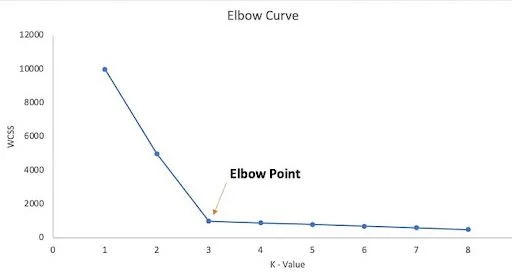
> Biasanyaa, memang ada debat antara ingin menggunakan titik ke tiga atau ke empat. Seringkalinya ditentukan pada konteks bisnis atau tujuan akhir yang ingin kita capai

*   Kalau kamu punya 100 data, dan kamu bikin $K=100$ (setiap orang punya kelompok sendiri-sendiri), maka **Variance-nya = 0**. (Jarak ke dirinya sendiri kan nol).

Terus kalau Variance 0 itu bagus secara matematika, **kenapa kita nggak pakai K=100 aja sekalian?**

Jawabannya: **Karena TIDAK BERGUNA secara Bisnis.**

Bayangkan Bos kamu minta segmentasi customer.
*   **Kamu:** *"Bos, saya sudah bikin segmentasi paling sempurna (Variance 0). Ada 100.000 kelompok untuk 100.000 customer kita."*
*   **Bos:** *"Lah? Terus tim marketing saya harus bikin 100.000 strategi promosi beda-beda gitu? Pecat aja saya sekalian!"*

### Di sinilah Seni "Elbow Method" Masuk (Trade-off)

Kita mencari titik **"Keseimbangan" (Sweet Spot)**.
Antara:
1.  **Akurasi (Variance Kecil)**
2.  **Kesederhanaan (Jumlah K Sedikit)**

Mari kita lihat grafik Siku (Elbow) lagi:

*   Dari $K=1$ ke $K=2$: Variance turun **DRASTIS** (Misal dari 1000 $\to$ 400).
    *   *Artinya:* Menambah 1 kelompok itu untung banget! Informasinya jadi jauh lebih jelas.
*   Dari $K=2$ ke $K=3$: Variance turun lumayan (Misal 400 $\to$ 200).
    *   *Artinya:* Masih untung.
*   Dari $K=3$ ke $K=4$: Variance turun dikiiit banget (Misal 200 $\to$ 180).
    *   *Artinya:* Nah, di sini mulai rugi. Kamu nambah kerjaan (nambah kelompok), tapi perbaikan datanya cuma seuprit. Ini namanya *Diminishing Returns*.

**Titik Siku (Elbow)** adalah momen di mana "Keuntungan" (penurunan variance) mulai kalah sama "Keribetan" (nambah kelompok).

### Soal Debat K=3 vs K=4 (Konteks Bisnis)

Seringkali secara matematika sikunya ada di antara 3 dan 4. Pilih yang mana?
Di sinilah peran kamu sebagai **Data Analyst** (bukan cuma tukang ngitung). Kamu harus tanya ke Tim Bisnis/Marketing:

**Skenario Debat:**
*   **Matematika:** K=3 variance-nya 200, K=4 variance-nya 180. (Beda tipis).
*   **Analisis Bisnis:**
    *   **Kalau K=3:** Ada kelompok "Low", "Mid", "High". (Simpel, gampang dieksekusi marketing).
    *   **Kalau K=4:** Ada kelompok "Low", "Mid", "High", dan "Very High".
    
**Pertanyaannya:** "Apakah tim marketing punya budget/tenaga buat bikin perlakuan khusus ke si 'Very High' ini?"

*   Kalau marketing bilang: *"Ah, budget kita terbatas, yang penting pisahin aja yang kaya sama yang miskin."* $\to$ **Pilih K=3**.
*   Kalau marketing bilang: *"Kita mau kasih hadiah Emas buat top 1% sultan!"* $\to$ **Pilih K=4** (supaya si "Very High" terpisah dari "High").

**Kesimpulan:**
Variance harus kecil, TAPI jumlah K harus **Actionable** (Bisa dieksekusi). Jangan mengejar Variance 0, tapi kejarlah Variance yang "Cukup Rendah" dengan jumlah kelompok yang "Masuk Akal".

For more intuitive understanding: 
[![K-Means Clustering Explanation](https://img.youtube.com/vi/R2e3Ls9H_fc/0.jpg)](https://www.youtube.com/watch?v=R2e3Ls9H_fc)

or you can play with this : [Visualizing K-Means Clustering - Naftali Harris](https://www.naftaliharris.com/blog/visualizing-k-means-clustering/)


# 3. Feature Engineering: Metodologi RFM

Untuk mengubah data transaksi mentah menjadi profil pelanggan yang dapat ditindaklanjuti, saya mengikuti video tutorial, si Trent menerapkan kerangka kerja analisis **RFM (Recency, Frequency, Monetary)**. Metode ini merupakan standar industri dalam ritel dan pemasaran untuk mengevaluasi nilai dan retensi pelanggan.

Tujuan dari tahap ini adalah melakukan agregasi data dari tingkat transaksi (banyak baris per pelanggan) menjadi data tingkat pelanggan (satu baris per pelanggan), yang dikarakterisasi oleh tiga metrik kuantitatif berikut:

### 1. Recency (R) - Kebaruan
*   **Definisi:** Mengukur jumlah hari yang berlalu sejak transaksi terakhir pelanggan dibandingkan dengan tanggal referensi (tanggal snapshot data).
*   **Signifikansi Bisnis:** Mengindikasikan tingkat keterlibatan (*engagement*) pelanggan. Nilai recency yang rendah menunjukkan keterlibatan tinggi, sedangkan nilai yang tinggi mengindikasikan risiko pelanggan berhenti berlangganan (*churn*).
*   **Perhitungan:** `Tanggal Referensi - Tanggal Faktur Terakhir`

### 2. Frequency (F) - Frekuensi
*   **Definisi:** Jumlah total transaksi unik (faktur) yang berhasil dilakukan oleh pelanggan dalam periode analisis.
*   **Signifikansi Bisnis:** Mencerminkan loyalitas dan kebiasaan pembelian pelanggan. Metrik ini membedakan antara pembeli sekali (*one-time buyer*) dengan pelanggan tetap.
*   **Perhitungan:** Menghitung jumlah unik `Invoice` per pelanggan.

### 3. Monetary (M) - Moneter
*   **Definisi:** Total nilai uang (pendapatan) yang dikontribusikan oleh pelanggan kepada perusahaan.
*   **Signifikansi Bisnis:** Mencerminkan daya beli dan profitabilitas pelanggan. Hal ini membantu dalam mengidentifikasi pelanggan bernilai tinggi (*High-Value Customers*) yang memberikan dampak signifikan terhadap omzet.
*   **Perhitungan:** Penjumlahan dari (`Quantity` * `Price`) untuk seluruh transaksi.

---

### Ilustrasi Transformasi Data
Dengan menerapkan metodologi ini, struktur data akan bertransformasi sebagai berikut:

**Input: Data Transaksi Mentah**
| Invoice | Customer ID | Tanggal | Quantity | Price |
| :--- | :--- | :--- | :--- | :--- |
| 536365 | 17850 | 01-12-2010 | 6 | 2.55 |
| 536365 | 17850 | 01-12-2010 | 8 | 3.39 |
| 536366 | 17850 | 02-12-2010 | 6 | 2.55 |

**Output: Fitur RFM Tingkat Pelanggan**
| Customer ID | Recency (Hari) | Frequency (Kali) | Monetary ($) |
| :--- | :--- | :--- | :--- |
| **17850** | 1 | 2 | 41.34 |

> *Catatan: Pada contoh di atas, Pelanggan 17850 memiliki 2 faktur unik (Frequency), terakhir berbelanja 1 hari yang lalu (Recency), dengan total belanja yang diakumulasikan dari seluruh barang (Monetary).*

In [97]:
cleaned_df["SalesLineTotal"] = cleaned_df["Quantity"] * cleaned_df["Price"]

cleaned_df

C:\Users\MSI KATANA 15\AppData\Local\Temp\ipykernel_23292\2846558921.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df["SalesLineTotal"] = cleaned_df["Quantity"] * cleaned_df["Price"]


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,SalesLineTotal
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.00,United Kingdom,5.90
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom,3.75
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom,3.75
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.00,United Kingdom,7.50


In [98]:
aggregated_df = cleaned_df.groupby(by="Customer ID", as_index=False) \
    .agg(
        MonetaryValue = ("SalesLineTotal", "sum"),
        Frequency = ("Invoice", "nunique"),
        LastInvoiceDate = ("InvoiceDate", "max")
    )    
    
aggregated_df.head(10)

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate
0,12346.00,169.36,2,2010-06-28 13:53:00
1,12347.00,1323.32,2,2010-12-07 14:57:00
2,12348.00,221.16,1,2010-09-27 14:59:00
3,12349.00,2221.14,2,2010-10-28 08:23:00
4,12351.00,300.93,1,2010-11-29 15:23:00
5,12352.00,343.80,2,2010-11-29 10:07:00
6,12353.00,317.76,1,2010-10-27 12:44:00
7,12355.00,488.21,1,2010-05-21 11:59:00
8,12356.00,3126.25,3,2010-11-24 12:24:00
9,12357.00,11229.99,1,2010-11-16 10:05:00


> Saya penasaran bagaimana logika di belakang layar itu terjadi, saya pengen tau setiap langkah itu apa sih yang terjadi


Bayangkan kita punya potongan data kecil ini (fokus pada 2 orang saja: ID **13085** dan ID **17530**):

| Invoice | StockCode | ... | Quantity | Price | Customer ID | SalesLineTotal | InvoiceDate |
| :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- |
| **489434** | 85048 | ... | 12 | 6.95 | **13085** | 83.40 | 2009-12-01 |
| **489434** | 79323P | ... | 12 | 6.75 | **13085** | 81.00 | 2009-12-01 |
| **538171** | 22271 | ... | 2 | 2.95 | **17530** | 5.90 | 2010-12-09 |
| **538171** | 22750 | ... | 1 | 3.75 | **17530** | 3.75 | 2010-12-09 |
| **538171** | 22751 | ... | 1 | 3.75 | **17530** | 3.75 | 2010-12-09 |

---

### Step 1: `groupby(by="Customer ID")`

Pandas akan memecah tabel besar itu menjadi beberapa **"Keranjang Kecil"** berdasarkan Customer ID.

**Keranjang 1: Customer 13085**
*   Isinya 2 baris (Transaksi Invoice 489434 semua).
*   Data: SalesLineTotal [83.40, 81.00], Invoice [489434, 489434], Date [2009-12-01, 2009-12-01].

**Keranjang 2: Customer 17530**
*   Isinya 3 baris (Transaksi Invoice 538171 semua).
*   Data: SalesLineTotal [5.90, 3.75, 3.75], Invoice [538171, 538171, 538171], Date [2010-12-09...].

---

### Step 2: `.agg(...)` (Menjalankan Operasi Matematika di Tiap Keranjang)

Sekarang Pandas masuk ke tiap keranjang dan menghitung rumus yang kamu minta.

#### A. Hitung `MonetaryValue` ("SalesLineTotal", "sum")

*   **Keranjang 13085:**
    *   Ambil data SalesLineTotal: `[83.40, 81.00]`
    *   Jumlahkan: $83.40 + 81.00 = \mathbf{164.40}$
*   **Keranjang 17530:**
    *   Ambil data SalesLineTotal: `[5.90, 3.75, 3.75]`
    *   Jumlahkan: $5.90 + 3.75 + 3.75 = \mathbf{13.40}$

#### B. Hitung `Frequency` ("Invoice", "nunique")

*   **Keranjang 13085:**
    *   Ambil data Invoice: `[489434, 489434]`
    *   Cari Unik: Cuma ada satu jenis angka yaitu `489434`.
    *   Hitung Jumlah Unik: **1**
*   **Keranjang 17530:**
    *   Ambil data Invoice: `[538171, 538171, 538171]`
    *   Cari Unik: Cuma ada satu jenis angka yaitu `538171`.
    *   Hitung Jumlah Unik: **1**

*(Catatan: Kalau misal Customer 13085 besok belanja lagi dengan Invoice baru 999999, maka listnya jadi [489434, 489434, 999999]. Jumlah Uniknya jadi 2).*

#### C. Hitung `LastInvoiceDate` ("InvoiceDate", "max")

*   **Keranjang 13085:**
    *   Ambil data Date: `[2009-12-01, 2009-12-01]`
    *   Cari Maksimum: **2009-12-01**
*   **Keranjang 17530:**
    *   Ambil data Date: `[2010-12-09, 2010-12-09, 2010-12-09]`
    *   Cari Maksimum: **2010-12-09**

---

### Step 3: Penggabungan Kembali (Final Output)

Setelah hitung-hitungan selesai di tiap keranjang, Pandas menyatukan hasilnya jadi tabel baru (`aggregated_df`):

| Customer ID | MonetaryValue | Frequency | LastInvoiceDate |
| :--- | :--- | :--- | :--- |
| 13085 | 164.40 | 1 | 2009-12-01 |
| 17530 | 13.40 | 1 | 2010-12-09 |

Inilah yang kamu lihat di output `head(10)`. Satu baris sudah mewakili satu orang dengan rangkuman perilaku belanjanya.

In [99]:
aggregated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4285 entries, 0 to 4284
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Customer ID      4285 non-null   float64       
 1   MonetaryValue    4285 non-null   float64       
 2   Frequency        4285 non-null   int64         
 3   LastInvoiceDate  4285 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 134.0 KB


Dari 400.000 data, sekarang tinggal 4285 data, Artinya, selama periode 2009-2010, toko ini melayani 4.285 orang berbeda (yang datanya valid/lengkap).


In [100]:
max_invoice_date = aggregated_df["LastInvoiceDate"].max()

aggregated_df["Recency"] = (max_invoice_date - aggregated_df["LastInvoiceDate"]).dt.days

aggregated_df.head(10)

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
0,12346.00,169.36,2,2010-06-28 13:53:00,164
1,12347.00,1323.32,2,2010-12-07 14:57:00,2
2,12348.00,221.16,1,2010-09-27 14:59:00,73
3,12349.00,2221.14,2,2010-10-28 08:23:00,42
4,12351.00,300.93,1,2010-11-29 15:23:00,10
5,12352.00,343.80,2,2010-11-29 10:07:00,10
6,12353.00,317.76,1,2010-10-27 12:44:00,43
7,12355.00,488.21,1,2010-05-21 11:59:00,202
8,12356.00,3126.25,3,2010-11-24 12:24:00,15
9,12357.00,11229.99,1,2010-11-16 10:05:00,23


### 📝 Catatan Perhitungan Recency

Dalam skenario bisnis *real-time*, metrik **Recency** umumnya dihitung berdasarkan tanggal saat ini (*today*) menggunakan fungsi waktu sistem.

Namun, karena analisis ini menggunakan **dataset historis** (transaksi tahun 2009-2010), penggunaan tanggal saat ini (2026) tidak relevan karena akan menghasilkan nilai Recency yang ekstrem (>5000 hari) untuk seluruh pelanggan.

**Metodologi:**
Kami menetapkan titik referensi waktu berdasarkan **tanggal transaksi terakhir** yang tercatat dalam dataset.
*   **Formula:** `Recency = Max(InvoiceDate) - LastInvoiceDate`
*   **Interpretasi:** Jumlah hari yang telah berlalu sejak pembelian terakhir pelanggan relatif terhadap akhir periode data.

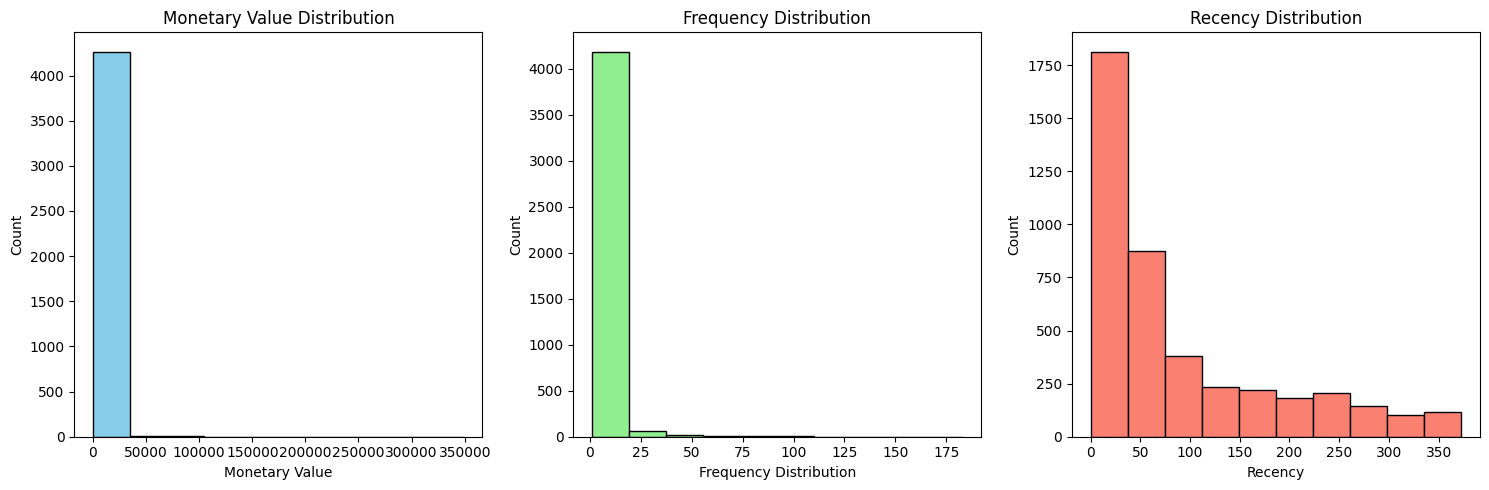

In [101]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.hist(aggregated_df['MonetaryValue'], bins=10, color='skyblue', edgecolor='black')
plt.title('Monetary Value Distribution')
plt.xlabel('Monetary Value')
plt.ylabel('Count')

plt.subplot(1,3,2)
plt.hist(aggregated_df['Frequency'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Frequency Distribution')
plt.xlabel('Frequency Distribution')
plt.ylabel('Count')

plt.subplot(1,3,3)
plt.hist(aggregated_df['Recency'], bins=10, color='salmon', edgecolor='black')
plt.title('Recency Distribution')
plt.xlabel('Recency')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

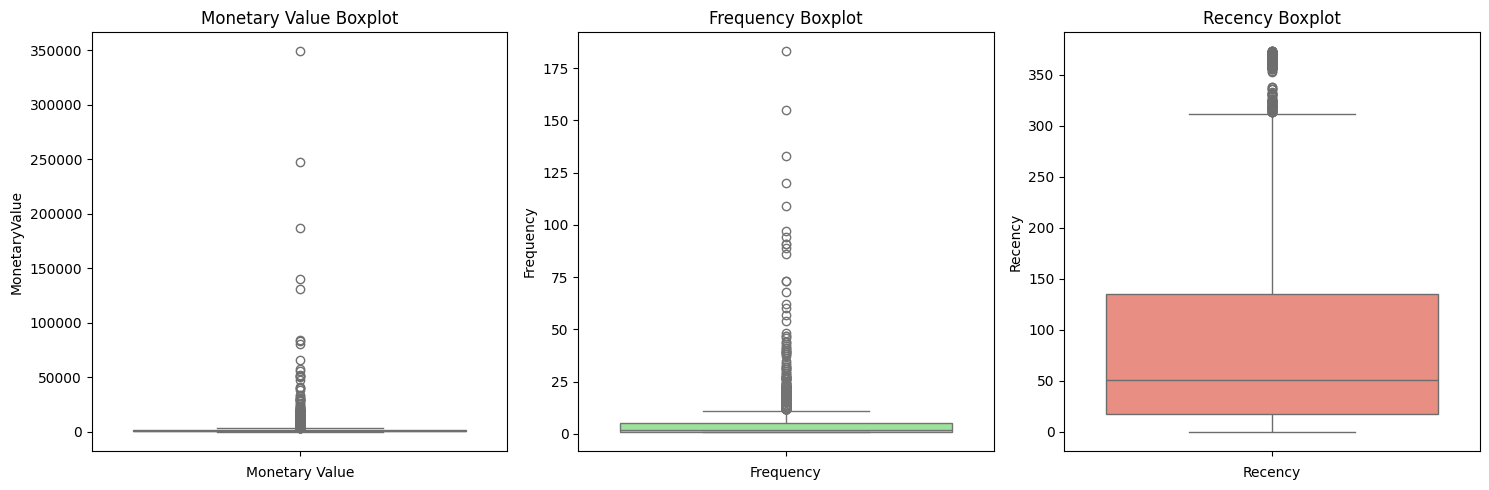

In [102]:
# Metode paling cocok buat ngecek Outliers
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data=aggregated_df['MonetaryValue'], color='skyblue')
plt.title('Monetary Value Boxplot')
plt.xlabel('Monetary Value')

plt.subplot(1, 3, 2)
sns.boxplot(data=aggregated_df['Frequency'], color='lightgreen')
plt.title('Frequency Boxplot')
plt.xlabel('Frequency')

plt.subplot(1, 3, 3)
sns.boxplot(data=aggregated_df['Recency'], color='salmon')
plt.title('Recency Boxplot')
plt.xlabel('Recency')

plt.tight_layout()
plt.show()

Kuncinya:
*   **Tabel Distribusi** (Lihat bawah pas line kode ini) melihat **"Berapa banyak ORANG di rentang nilai tertentu"**.
*   **Boxplot** melihat **"Di nilai BERAPA sih posisi orang ke-25%, ke-50%, dan ke-75%?"**.

---

### Cara Baca Boxplot (Versi Detail)

Kita fokus ke **Recency (Kotak Merah)** karena paling jelas bentuknya.

Bayangkan kamu punya 100 orang berbaris urut dari yang paling rajin belanja (Recency 0) sampai yang paling malas (Recency 373).

1.  **Garis Bawah Kotak (Q1 / 25%)**:
    *   Lihat garis bawah kotak merah itu ada di angka sekitar **17**.
    *   *Artinya:* Orang urutan ke-25 (seperempat barisan terdepan) punya nilai Recency 17.
    *   *Terjemahan:* "25% pelanggan ter-rajin kita, belanja terakhirnya kurang dari 17 hari yang lalu."

2.  **Garis Tengah Kotak (Median / 50%)**:
    *   Garis yang membelah kotak ada di angka sekitar **50**.
    *   *Artinya:* Orang urutan ke-50 (tengah-tengah barisan) punya nilai Recency 50.
    *   *Terjemahan:* "Separuh pelanggan kita (50%) belanja terakhirnya kurang dari 50 hari yang lalu."

3.  **Garis Atas Kotak (Q3 / 75%)**:
    *   Garis tutup kotak merah ada di angka sekitar **140**.
    *   *Artinya:* Orang urutan ke-75 punya nilai Recency 140.
    *   *Terjemahan:* "75% pelanggan kita (sebagian besar) belanja terakhirnya kurang dari 140 hari yang lalu."

---

### Bandingkan dengan Tabel Distribusi (Recency)

Tabel Teks tadi bilang:
*   Rentang **0 - 37 Hari** = **42.33% Orang**.

Cek ke Boxplot:
*   Garis tengah (Median 50%) ada di angka 50-an hari.
*   *Cocok kan?* Di tabel bilang 42% orang ada di bawah 37 hari. Di boxplot bilang 50% orang ada di bawah 50 hari. Angkanya nyambung/konsisten.

---

### Kenapa Monetary (Biru) Kotaknya Gepeng?

Cek Tabel Teks Monetary:
*   Rentang **0 - 34.000** = **99.53% Orang**.

Artinya:
*   Orang ke-25% (Q1) $\to$ Belanjanya dikit (Misal 200).
*   Orang ke-50% (Median) $\to$ Belanjanya dikit (Misal 500).
*   Orang ke-75% (Q3) $\to$ Belanjanya dikit (Misal 1000).

Karena angka 200, 500, dan 1000 itu **SANGAT KECIL** dibandingkan Sultan yang belanja **350.000**, maka di gambar Boxplot:
*   Garis Q1, Median, Q3 semuanya **Gencet-gencetan** di bawah (dekat angka 0).
*   Makanya kotaknya jadi gepeng kayak garis doang.
*   Titik-titik di atasnya itu si Sultan (Outlier) yang bikin skala Y-nya jadi melar ke atas.

In [103]:
# Disini saya meminta tolong kepada AI untuk "ah i see, terus ini bisa gak yaa gambar itu ditampilkan dalam bentuk tabel kata kataa gituu?? jadi outputnyaa bukann berupa gambarr, tapi berupa kalimat teks gitu dalam tabel yang nunjukin lengkap kalau yang rentang sekian itu segini dan seterusnyaa? bisa buatinn? yang baguss formatnya"

# Fungsi untuk bikin Tabel Distribusi Frekuensi
def buat_tabel_distribusi(kolom, nama_kolom, n_bins=10):
    # 1. Bikin rentang (binning)
    # pd.cut memotong data jadi 10 bagian
    counts = pd.cut(aggregated_df[kolom], bins=n_bins).value_counts().sort_index()
    
    # 2. Bikin DataFrame rapi
    tabel = pd.DataFrame({
        'Rentang Nilai': counts.index,
        'Jumlah Customer': counts.values
    })
    
    # 3. Hitung Persentase biar lebih kebayang
    tabel['Persentase (%)'] = (tabel['Jumlah Customer'] / tabel['Jumlah Customer'].sum()) * 100
    
    print(f"--- TABEL DISTRIBUSI: {nama_kolom} ---")
    display(tabel)
    print("\n")

# Panggil fungsinya buat 3 kolom RFM
buat_tabel_distribusi('MonetaryValue', 'MONETARY (Total Belanja)')
buat_tabel_distribusi('Frequency', 'FREQUENCY (Seringnya Belanja)')
buat_tabel_distribusi('Recency', 'RECENCY (Hari Terakhir Belanja)')

--- TABEL DISTRIBUSI: MONETARY (Total Belanja) ---


,Rentang Nilai,Jumlah Customer,Persentase (%)
0,"(-347.613, 34917.83]",4265,99.53
1,"(34917.83, 69834.11]",12,0.28
2,"(69834.11, 104750.39]",3,0.07
3,"(104750.39, 139666.67]",1,0.02
4,"(139666.67, 174582.95]",1,0.02
5,"(174582.95, 209499.23]",1,0.02
6,"(209499.23, 244415.51]",0,0.00
7,"(244415.51, 279331.79]",1,0.02
8,"(279331.79, 314248.07]",0,0.00
9,"(314248.07, 349164.35]",1,0.02




--- TABEL DISTRIBUSI: FREQUENCY (Seringnya Belanja) ---


,Rentang Nilai,Jumlah Customer,Persentase (%)
0,"(0.818, 19.2]",4187,97.71
1,"(19.2, 37.4]",62,1.45
2,"(37.4, 55.6]",19,0.44
3,"(55.6, 73.8]",6,0.14
4,"(73.8, 92.0]",4,0.09
5,"(92.0, 110.2]",3,0.07
6,"(110.2, 128.4]",1,0.02
7,"(128.4, 146.6]",1,0.02
8,"(146.6, 164.8]",1,0.02
9,"(164.8, 183.0]",1,0.02




--- TABEL DISTRIBUSI: RECENCY (Hari Terakhir Belanja) ---


,Rentang Nilai,Jumlah Customer,Persentase (%)
0,"(-0.373, 37.3]",1814,42.33
1,"(37.3, 74.6]",876,20.44
2,"(74.6, 111.9]",382,8.91
3,"(111.9, 149.2]",234,5.46
4,"(149.2, 186.5]",221,5.16
5,"(186.5, 223.8]",184,4.29
6,"(223.8, 261.1]",208,4.85
7,"(261.1, 298.4]",145,3.38
8,"(298.4, 335.7]",104,2.43
9,"(335.7, 373.0]",117,2.73


### 📊 Analisis Distribusi Data RFM

Berdasarkan visualisasi histogram dan tabel distribusi frekuensi di atas, berikut adalah temuan utama mengenai karakteristik data pelanggan:

#### 1. Catatan Teknis: Nilai Negatif pada Rentang Awal
Pada tabel distribusi, terlihat batas bawah interval bernilai negatif (contoh: `-347.613` pada Monetary atau `-0.373` pada Recency).
*   **Penjelasan:** Ini bukan data bernilai negatif. Ini adalah mekanisme teknis dari fungsi `pandas.cut` yang sedikit memperlebar batas bawah interval (*margin*) untuk memastikan nilai minimum (0) tetap terhitung masuk ke dalam keranjang (inklusif). Secara praktis, batas ini dapat dibaca mulai dari **0**.

#### 2. Distribusi Monetary (Total Belanja)
*   **Kondisi:** Sangat timpang (*Highly Skewed*).
*   **Temuan:** Sebanyak **99.53%** pelanggan berada pada rentang belanja terendah (0 - 34.000). Hanya segelintir pelanggan ekstrem (*Outliers*) yang berbelanja hingga >300.000.
*   **Implikasi:** Adanya outlier "Sultan" ini dapat mendistorsi pembentukan klaster pada algoritma K-Means jika tidak ditangani.

#### 3. Distribusi Frequency (Frekuensi Belanja)
*   **Kondisi:** Sangat timpang (*Highly Skewed*).
*   **Temuan:** Mayoritas mutlak (**97.71%**) pelanggan berbelanja dalam frekuensi wajar (1 - 19 kali). Namun, terdapat outlier ekstrem (kemungkinan *reseller*) yang bertransaksi hingga >160 kali dalam satu periode.

#### 4. Distribusi Recency (Kebaruan Transaksi)
*   **Kondisi:** Terdistribusi lebih wajar (*Decent Distribution*).
*   **Temuan:** Pola data menurun secara gradual. Sekitar **42.33%** pelanggan baru saja bertransaksi dalam 37 hari terakhir (pelanggan aktif). Pelanggan yang sudah lama tidak aktif (>300 hari) jumlahnya minoritas.
*   **Implikasi:** Variabel ini memiliki sebaran yang cukup sehat untuk analisis klasterisasi tanpa perlu penanganan ekstrem.

**Kesimpulan Awal:**
Variabel **Monetary** dan **Frequency** memerlukan pra-pemrosesan lebih lanjut (seperti transformasi logaritmik) untuk menormalkan sebaran data dan mengurangi dampak outlier sebelum dimasukkan ke dalam model K-Means.

Mungkin ide pertama kita, ingin langsung hapus aja ya kan outlier outlier itu. Nah akan tetapi dalam konteks ini, sebenernyaa informasi itu akan berharga buat kita. Jika dilihat dan coba dianalisis mendasar, bisa dikatakan bahwa data itu mempresentasikan seorang customer yang paling banyak ngabisisn uang dan bisa sajaa yang merupakan orang yang loyal? orang yang perlu dilakukan lebih istimewa (VIP) dan sebagainya. 

Kita enggak ingin untuk menghapus customer-customer yang outlier ini karena mereka sebenernya yang paling bervalueable buat kita. Kita fokuss pada tujuan utama kita apa, biarkan model yang menyesuaikan tujuan kita. 

Starategi kita (Trent) adalah memisahkan dulu data outlier, kita analisis nanti dan sisanya akan kita gunakan untuk sebagai input bagi model KMeans kita.

In [104]:
M_Q1 = aggregated_df["MonetaryValue"].quantile(0.25)
M_Q3 = aggregated_df["MonetaryValue"].quantile(0.75)
M_IQR = M_Q3 - M_Q1

monetary_outliers_df = aggregated_df[(aggregated_df["MonetaryValue"]> (M_Q3 + 1.5 * M_IQR)) | (aggregated_df["MonetaryValue"] <(M_Q1 - 1.5 * M_IQR))].copy()  # Umumnya seperti ini, tapi ada kasus-kasus tertentu
monetary_outliers_df.describe()


,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,423.00,423.00,423.00,423,423.00
mean,15103.04,12188.10,17.17,2010-11-09 12:26:02.978723328,30.04
min,12357.00,3802.04,1.00,2009-12-10 18:03:00,0.00
25%,13622.00,4605.94,8.00,2010-11-08 13:17:30,3.00
50%,14961.00,6191.32,12.00,2010-11-26 12:19:00,13.00
75%,16692.00,10273.24,18.00,2010-12-06 10:34:30,31.00
max,18260.00,349164.35,183.00,2010-12-09 19:32:00,364.00
std,1728.66,25830.85,19.73,NaN,51.54


In [105]:
F_Q1 = aggregated_df["Frequency"].quantile(0.25)
F_Q3 = aggregated_df["Frequency"].quantile(0.75)
F_IQR = F_Q3 - F_Q1

frequency_outliers_df = aggregated_df[(aggregated_df["Frequency"]> (F_Q3 + 1.5 * F_IQR)) | (aggregated_df["Frequency"] <(F_Q1 - 1.5 * F_IQR))].copy()  # Umumnya seperti ini, tapi ada kasus-kasus tertentu
frequency_outliers_df.describe()


,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,279.00,279.00,279.00,279,279.00
mean,15352.66,14409.71,23.81,2010-11-23 11:06:20.645161216,16.09
min,12437.00,1094.39,12.00,2010-05-12 16:51:00,0.00
25%,13800.00,4331.56,13.00,2010-11-20 13:14:30,2.00
50%,15465.00,6615.77,17.00,2010-12-02 10:46:00,7.00
75%,16828.50,11692.41,23.00,2010-12-07 11:08:30,19.00
max,18260.00,349164.35,183.00,2010-12-09 19:32:00,211.00
std,1748.43,31381.74,21.93,NaN,26.59


> Perlu dicatat, untuk kedua outlier ini sebenernya bisa saja memiliki overlap satu sama lain. Secara intuitive, jika orang melakukan banyak pembelian (`Frequency` besar) maka bisa sajaa uang yang dihabiskan juga banyak (`Monetary` besar). Meskipun, ada kemungkinan juga, sering beli tapi dalam jumlah kecil

In [106]:
# Mencari Customer ID yang ada di KEDUA tabel outlier
overlap_customers = set(monetary_outliers_df['Customer ID']).intersection(set(frequency_outliers_df['Customer ID']))

print(f"Jumlah Sultan (Monetary Outlier): {len(monetary_outliers_df)}")
print(f"Jumlah Si Rajin (Frequency Outlier): {len(frequency_outliers_df)}")
print(f"Jumlah 'Sultan Rajin' (Overlap): {len(overlap_customers)}")

Jumlah Sultan (Monetary Outlier): 423
Jumlah Si Rajin (Frequency Outlier): 279
Jumlah 'Sultan Rajin' (Overlap): 226


## Good to Know : 

Siap! Mari kita bedah rumus detektif pencari outlier ini: **IQR Method (Interquartile Range)**.

Ini adalah metode standar statistik untuk menentukan: *"Mana sih batas normal, dan mana yang udah kelewatan (ekstrem)?"*

Mari kita pakai analogi **Gaji Penduduk Desa (100 Orang)**.

---

### Step 1: Urutkan Data (Sorting)
Bayangkan kita bariskan 100 orang dari yang gajinya paling kecil sampai paling besar.

*   Orang ke-1: Gaji Rp 1.000
*   ...
*   Orang ke-50: Gaji Rp 5.000
*   ...
*   Orang ke-100: Gaji Rp 1.000.000 (Sultan)

### Step 2: Cari Posisi Kuartil (Q1 dan Q3)
Kode: `aggregated_df["MonetaryValue"].quantile(0.25)`

1.  **Q1 (Kuartil 1 / 25%)**: Kita cari orang di urutan ke-25.
    *   Misal gajinya **Rp 3.000**.
    *   Ini adalah batas bawah orang "biasa".
2.  **Q3 (Kuartil 3 / 75%)**: Kita cari orang di urutan ke-75.
    *   Misal gajinya **Rp 8.000**.
    *   Ini adalah batas atas orang "biasa".

### Step 3: Hitung Lebar Badan (IQR)
Kode: `M_IQR = M_Q3 - M_Q1`

**IQR** (*Interquartile Range*) adalah jarak antara si Q3 dan Q1.
*   $IQR = 8.000 - 3.000 = \mathbf{5.000}$
*   Artinya: "Sebagian besar orang (tengah-tengah) gajinya cuma selisih 5.000 perak."

### Step 4: Tentukan Batas "Wajar" (The Fence)
Statistik punya aturan baku: **"Batas wajar adalah 1.5 kali lebar badan (IQR)."**

Kenapa 1.5? Itu aturan umum (Rule of Thumb) dari bapak statistik John Tukey. Angka ini dianggap pas buat nentuin mana yang "aneh".

1.  **Batas Atas Wajar:**
    $$ \text{Q3} + (1.5 \times \text{IQR}) $$
    $$ 8.000 + (1.5 \times 5.000) = 8.000 + 7.500 = \mathbf{15.500} $$
    *   *Artinya:* Siapapun yang gajinya di atas Rp 15.500 dianggap **Outlier Kaya**.

2.  **Batas Bawah Wajar:**
    $$ \text{Q1} - (1.5 \times \text{IQR}) $$
    $$ 3.000 - 7.500 = \mathbf{-4.500} $$
    *   *Artinya:* Siapapun yang gajinya di bawah ini outlier miskin. (Tapi di kasus belanja, jarang ada minus, jadi batas bawah ini sering diabaikan kalau nilainya negatif).

### Step 5: Filter Data (Eksekusi)
Kode: `aggregated_df[ ... > Batas Atas ...]`

Komputer akan mengecek satu-satu:
*   Budi (Gaji 5.000) $\to$ Di bawah 15.500 $\to$ **Normal**.
*   Siti (Gaji 10.000) $\to$ Di bawah 15.500 $\to$ **Normal**.
*   **Sultan (Gaji 1.000.000)** $\to$ Di atas 15.500 $\to$ **OUTLIER! TANGKAP!**

---

### Ringkasan Proses Kodingan Kamu:

1.  **`quantile(0.25)`**: Cari angka batas bawah (Q1).
2.  **`quantile(0.75)`**: Cari angka batas atas (Q3).
3.  **`IQR`**: Hitung selisihnya.
4.  **`(M_Q3 + 1.5 * M_IQR)`**: Hitung "Pagar Batas Atas".
5.  **`aggregated_df[...]`**: Ambil semua orang yang nilainya **lompat** melewati pagar tersebut.

Hasilnya (`monetary_outliers_df`) adalah daftar orang-orang yang "melompati pagar kewajaran" alias para Sultan. Jelas Mas?

> Saya sangat amat perlu untuk mengulang dan belajar statistika lagi deh

In [107]:
non_outliers_df = aggregated_df[(~aggregated_df.index.isin(monetary_outliers_df.index)) & (~aggregated_df.index.isin(frequency_outliers_df.index)) ] # simbol `~` itu NOT

non_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,3809.00,3809.00,3809.00,3809,3809.00
mean,15376.48,885.50,2.86,2010-09-03 11:16:46.516146176,97.08
min,12346.00,1.55,1.00,2009-12-01 10:49:00,0.00
25%,13912.00,279.91,1.00,2010-07-08 14:48:00,22.00
50%,15389.00,588.05,2.00,2010-10-12 16:25:00,58.00
75%,16854.00,1269.05,4.00,2010-11-17 13:14:00,154.00
max,18287.00,3788.21,11.00,2010-12-09 20:01:00,373.00
std,1693.20,817.67,2.24,NaN,98.11


> The data is a lot better now

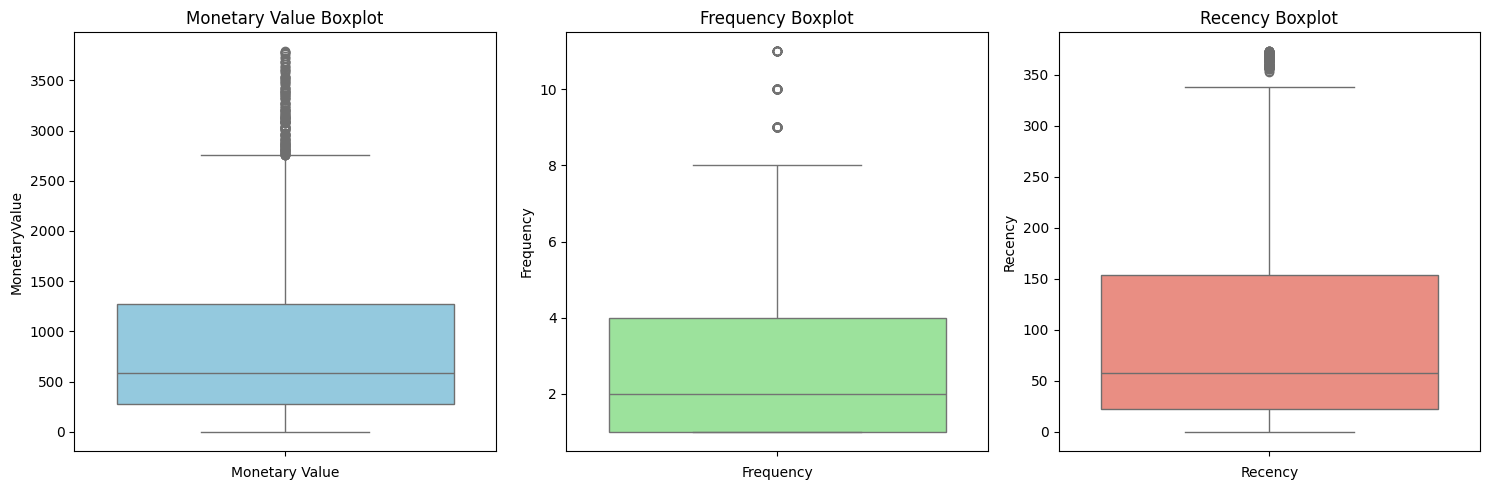

In [108]:
# Metode paling cocok buat ngecek Outliers
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data=non_outliers_df['MonetaryValue'], color='skyblue')
plt.title('Monetary Value Boxplot')
plt.xlabel('Monetary Value')

plt.subplot(1, 3, 2)
sns.boxplot(data=non_outliers_df['Frequency'], color='lightgreen')
plt.title('Frequency Boxplot')
plt.xlabel('Frequency')

plt.subplot(1, 3, 3)
sns.boxplot(data=non_outliers_df['Recency'], color='salmon')
plt.title('Recency Boxplot')
plt.xlabel('Recency')

plt.tight_layout()
plt.show()

> Ini jauh lebih tolerateable dibandingkan dengan yang sebelumnya



### Analisis Grafik After Cleaning (Non-Outliers)

1.  **Monetary (Kiri - Biru):**
    *   **Dulu:** Kotaknya gepeng di bawah, titiknya terbang sampai 350.000.
    *   **Sekarang:** Kotaknya (Box) kelihatan jelas dan besar! Batas atasnya (Kumis) ada di sekitar 2.700-an.
    *   **Outlier:** Masih ada titik-titik di atas kumis (sampai 3.700), tapi ini **WAJAR**. Jaraknya dekat. K-Means masih bisa menoleransi perbedaan 1.000 poin, tapi gak bisa menoleransi perbedaan 300.000 poin.

2.  **Frequency (Tengah - Hijau):**
    *   **Dulu:** Titik sampai 175.
    *   **Sekarang:** Titik maksimal cuma 11.
    *   **Box:** Kelihatan jelas bahwa mayoritas orang belanja 1-4 kali. Ini data yang sangat *representatif* untuk populasi umum.

3.  **Recency (Kanan - Merah):**
    *   **Kondisi:** Tidak banyak berubah karena dari awal Recency sudah cukup sehat. Tapi sekarang skalanya jadi lebih padat.

---

### Makna "Tolerable Outliers"

Kenapa Trent bilang *"Masih ada outlier, tapi tolerable"*?

Di dunia nyata, data itu gak pernah mulus 100% kayak pantat bayi. Pasti ada "noise".
*   Kalau kita paksakan buang SEMUA titik hitam itu sampai bersih, nanti data kita habis.
*   Outlier yang sekarang (misal Monetary 3.500) itu masih dianggap "Customer Biasa yang agak boros dikit", BUKAN "Sultan".
*   Mesin K-Means masih sanggup menghitung jarak segitu tanpa jadi bias parah.

In [109]:
non_outliers_df.head(10)

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
0,12346.00,169.36,2,2010-06-28 13:53:00,164
1,12347.00,1323.32,2,2010-12-07 14:57:00,2
2,12348.00,221.16,1,2010-09-27 14:59:00,73
3,12349.00,2221.14,2,2010-10-28 08:23:00,42
4,12351.00,300.93,1,2010-11-29 15:23:00,10
5,12352.00,343.80,2,2010-11-29 10:07:00,10
6,12353.00,317.76,1,2010-10-27 12:44:00,43
7,12355.00,488.21,1,2010-05-21 11:59:00,202
8,12356.00,3126.25,3,2010-11-24 12:24:00,15
10,12358.00,2519.01,3,2010-11-29 10:56:00,10


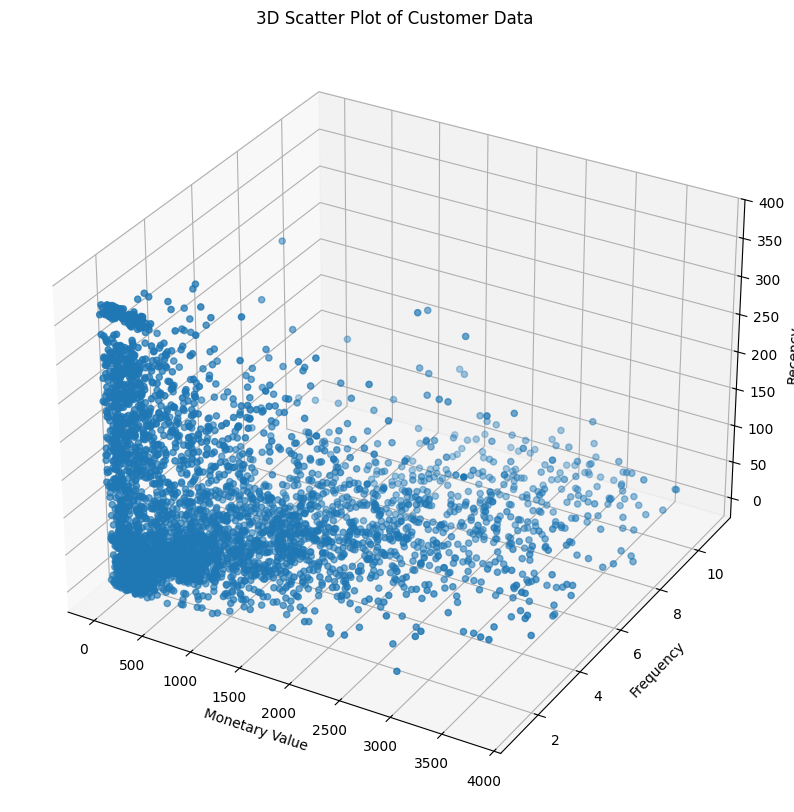

In [110]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')  # 111 artinya: 1 baris, 1 kolom, urutan 1

scatter = ax.scatter(non_outliers_df["MonetaryValue"], non_outliers_df["Frequency"], non_outliers_df["Recency"] )

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data')

plt.show()

> Dapat dilihat, bahwasannya setiap axes memiliki perbedaan skala, misalnya monetary value yang dimana nilainya rentang 500, sedangkan frequency hanya rentang 2 dan sebagainyaa

### ⚠️ Visualisasi Masalah Skala (Scaling Issue)

Berdasarkan *3D Scatter Plot* di atas, terlihat jelas adanya ketimpangan skala antar variabel (*Feature Scaling Problem*):

*   **Monetary (Sumbu X):** Memiliki rentang nilai dalam ribuan (0 - 3.500+).
*   **Recency (Sumbu Z):** Memiliki rentang nilai dalam ratusan (0 - 370).
*   **Frequency (Sumbu Y):** Memiliki rentang nilai satuan (1 - 11).

**Dampak pada K-Means:**
Algoritma K-Means menggunakan perhitungan **Jarak Euclidean** untuk menentukan kedekatan antar titik data.
Tanpa normalisasi skala, algoritma akan menjadi **bias** terhadap variabel dengan nilai nominal terbesar (Monetary). Perbedaan kecil pada Monetary (misal: 500 poin) akan dianggap jauh lebih signifikan daripada perbedaan pada Frequency (misal: 5 poin), padahal secara bisnis, frekuensi belanja sangat krusial.

**Kenapa ini Masalah Besar buat K-Means?**

K-Means itu ngitung jarak pakai rumus Pythagoras (Jarak Euclidean).
$$ Jarak = \sqrt{(x_2-x_1)^2 + (y_2-y_1)^2 + (z_2-z_1)^2} $$

Bayangkan:
*   Beda 1 poin di Frequency $\to$ $1^2 = 1$. (Kecil banget).
*   Beda 1000 poin di Monetary $\to$ $1000^2 = 1.000.000$. (Gede banget).

**Akibatnya:**
K-Means bakal **MENGABAIKAN Frequency**. Dia bakal mikir: *"Ah, Frequency cuma beda 1-2 angka doang, gak penting. Monetary bedanya ribuan, ini yang penting!"*

Padahal secara bisnis, beda belanja 1 kali vs 10 kali itu signifikan banget (Loyal vs Coba-coba).

**Solusi:**
Kita wajib melakukan **Standardisasi Data (Scaling)** menggunakan `StandardScaler` untuk mengubah distribusi data menjadi skala standar (Mean = 0, Std Dev = 1). Hal ini memastikan setiap variabel memiliki bobot yang setara dalam proses klasterisasi.

Untuk mengatasi masalah perbedaan skala antar variabel (Monetary dalam ribuan vs Frequency dalam satuan), kita menerapkan teknik **Standard Scaling** (disebut juga Z-score Normalization).

Metode ini mentransformasi nilai asli data sehingga distribusi data yang baru akan memiliki **Rata-rata (Mean) = 0** dan **Standar Deviasi = 1**. Hal ini menjamin bahwa setiap fitur memberikan kontribusi yang setara (*equal weight*) dalam perhitungan jarak K-Means.

### Rumus Matematis
$$ z = \frac{x - \mu}{\sigma} $$

**Keterangan:**
*   $z$ : Nilai hasil standardisasi (*Standardized value* / Z-score).
*   $x$ : Nilai asli data (*Original value*).
*   $\mu$ ($\text{mu}$) : Rata-rata (*Mean*) dari fitur tersebut.
*   $\sigma$ ($\text{sigma}$) : Standar Deviasi dari fitur tersebut.

---

### 💡 Ilustrasi Studi Kasus (Mengapa ini Penting?)

Mari kita simulasikan bagaimana rumus ini bekerja pada data RFM kita agar menjadi setara.

**Kasus:**
Kita memiliki Customer A yang sangat loyal.
1.  **Monetary (Uang):** Dia belanja **3.000**. (Rata-rata populasi = 1.500, Standar Deviasi = 500).
2.  **Frequency (Frekuensi):** Dia belanja **10 kali**. (Rata-rata populasi = 4 kali, Standar Deviasi = 2).

**Tanpa Scaling:**
K-Means akan melihat angka **3.000** jauh lebih besar daripada **10**. Fitur Frequency akan dianggap tidak penting.

**Dengan Standard Scaling (Hitungan Manual):**

1.  **Hitung Z-Score Monetary:**
    $$ z = \frac{3000 - 1500}{500} = \frac{1500}{500} = \mathbf{3.0} $$

2.  **Hitung Z-Score Frequency:**
    $$ z = \frac{10 - 4}{2} = \frac{6}{2} = \mathbf{3.0} $$

**Kesimpulan:**
Setelah di-scaling, komputer melihat bahwa kontribusi Monetary (Nilai 3.0) dan Frequency (Nilai 3.0) adalah **SETARA**. Keduanya sama-sama "3 poin di atas rata-rata". Inilah kondisi ideal untuk algoritma K-Means.

> Ada beberapa hal yang perlu dicatat, bahwasannyaa dalam hal ini, kitaa mengansumsi saja untuk distribusi data kita memiliki distribusi normal. 
<div align="center">

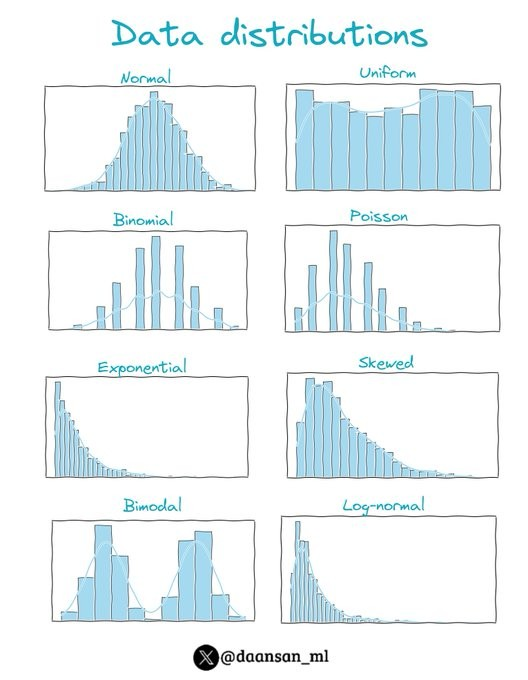

</div>

Masih ada banyak metode standardisasi yang mungkin lebih coock untuk data kita, dan kita di kasus nyata, seharusnyaa menggunakan metode yang paling baik


**Apa Alternatif di Kasus Nyata?**
Kalau data kamu bener-bener parah mencengnya dan outliernya gak boleh dibuang, kita biasanya pakai:
1.  **RobustScaler:** Ini kebal sama outlier (karena pakai Median & IQR, bukan Mean & StdDev).
2.  **Log Transformation:** Ini paling ampuh buat bikin data menceng jadi normal.
3.  **MinMaxScaler:** Ini buat maksa data jadi rentang 0 sampai 1.

Tapi buat tutorial ini, langkah Trent (buang outlier $\to$ StandardScaler) adalah **pendekatan pragmatis** yang sangat umum dipakai. Jadi, "kita tahu ini asumsi, tapi ini solusi yang *work*".

In [111]:
scaler = StandardScaler()

scaled_data = scaler.fit_transform(non_outliers_df[["MonetaryValue", "Frequency", "Recency"]])

scaled_data

array([[-0.87594534, -0.38488934,  0.68214853],
       [ 0.5355144 , -0.38488934, -0.96925093],
       [-0.81258645, -0.83063076, -0.24548944],
       ...,
       [-0.62197163, -0.83063076,  2.01753946],
       [ 0.44146683, -0.38488934,  0.14187587],
       [ 1.72488781,  0.50659348, -0.81634357]], shape=(3809, 3))

> Proses nya gimana sihh?? 

Tentu! Mari kita bongkar "Sihir Matematika" di balik layar `StandardScaler` dan `fit_transform`.

Kita pakai contoh data sederhana (3 Pelanggan) biar gampang dibayangkan.

**Data Awal (`non_outliers_df`):**
| Customer | Monetary (M) | Frequency (F) |
| :--- | :--- | :--- |
| A | 1000 | 2 |
| B | 2000 | 4 |
| C | 3000 | 6 |

---

### Tahap 1: `scaler.fit` (Belajar dari Data)
Saat kamu panggil `fit`, komputer akan "mempelajari" karakteristik kolom M dan F secara terpisah. Dia menghitung **Rata-rata ($\mu$)** dan **Standar Deviasi ($\sigma$)**.

**Perhitungan Otak Komputer:**

1.  **Untuk Kolom Monetary (M):**
    *   Rata-rata ($\mu_M$) = $(1000+2000+3000) / 3 = \mathbf{2000}$
    *   *Anggap saja Standar Deviasi ($\sigma_M$) = 1000 (biar gampang hitungnya)*.

2.  **Untuk Kolom Frequency (F):**
    *   Rata-rata ($\mu_F$) = $(2+4+6) / 3 = \mathbf{4}$
    *   *Anggap saja Standar Deviasi ($\sigma_F$) = 2*.

*Sekarang Scaler sudah punya "Kunci Jawaban" ($\mu$ dan $\sigma$) di memori.*

---

### Tahap 2: `.transform` (Mengubah Data)
Komputer menerapkan rumus sakti $z = \frac{x - \mu}{\sigma}$ ke **Setiap Sel Data**.

**Transformasi Customer A:**
*   **Monetary Baru:** $\frac{1000 - 2000}{1000} = \frac{-1000}{1000} = \mathbf{-1.0}$
*   **Frequency Baru:** $\frac{2 - 4}{2} = \frac{-2}{2} = \mathbf{-1.0}$

**Transformasi Customer B:**
*   **Monetary Baru:** $\frac{2000 - 2000}{1000} = \mathbf{0.0}$
*   **Frequency Baru:** $\frac{4 - 4}{2} = \mathbf{0.0}$

**Transformasi Customer C:**
*   **Monetary Baru:** $\frac{3000 - 2000}{1000} = \mathbf{1.0}$
*   **Frequency Baru:** $\frac{6 - 4}{2} = \mathbf{1.0}$

---

### Tahap 3: Hasil Akhir (`scaled_data_df`)

Tabel kamu berubah wujud menjadi seperti ini:

| Customer | Monetary (Z) | Frequency (Z) |
| :--- | :--- | :--- |
| A | -1.0 | -1.0 |
| B | 0.0 | 0.0 |
| C | 1.0 | 1.0 |

**Apa Artinya?**
*   **Angka Negatif (-1.0):** Artinya nilai customer ini **DI BAWAH RATA-RATA**.
*   **Angka Nol (0.0):** Artinya nilai customer ini **PERSIS RATA-RATA**.
*   **Angka Positif (1.0):** Artinya nilai customer ini **DI ATAS RATA-RATA**.

Lihat `scaled_data_df` kamu:
*   Baris 0 (Customer 12346): Monetary **-0.88**.
    *   *Artinya:* Dia belanja di bawah rata-rata (customer kecil).
*   Baris 3 (Customer 12349): Monetary **1.63**.
    *   *Artinya:* Dia belanja jauh di atas rata-rata (customer lumayan besar).

Sekarang, skala angka mereka sudah setara (berkisar antara -2 sampai +2), jadi K-Means bisa menilai mereka dengan adil tanpa tertipu nominal ribuan.

In [112]:
scaled_data_df = pd.DataFrame(scaled_data, index=non_outliers_df.index, columns=("MonetaryValue", "Frequency", "Recency"))
scaled_data_df

,MonetaryValue,Frequency,Recency
0,-0.88,-0.38,0.68
1,0.54,-0.38,-0.97
2,-0.81,-0.83,-0.25
3,1.63,-0.38,-0.56
4,-0.72,-0.83,-0.89
...,...,...,...
4280,-0.30,1.40,-0.82
4281,-0.58,-0.83,-0.32
4282,-0.62,-0.83,2.02
4283,0.44,-0.38,0.14


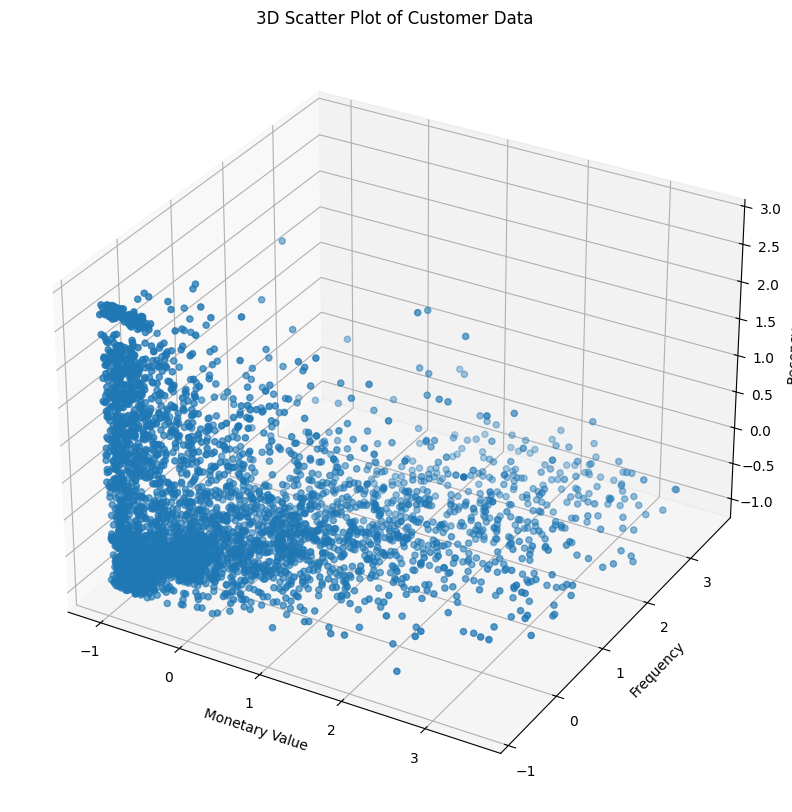

In [113]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')  # 111 artinya: 1 baris, 1 kolom, urutan 1

scatter = ax.scatter(scaled_data_df["MonetaryValue"], scaled_data_df["Frequency"], scaled_data_df["Recency"] )

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data')

plt.show()

> Sekarang setiap data memiliki bobot yang sama

# KMeans Clustering

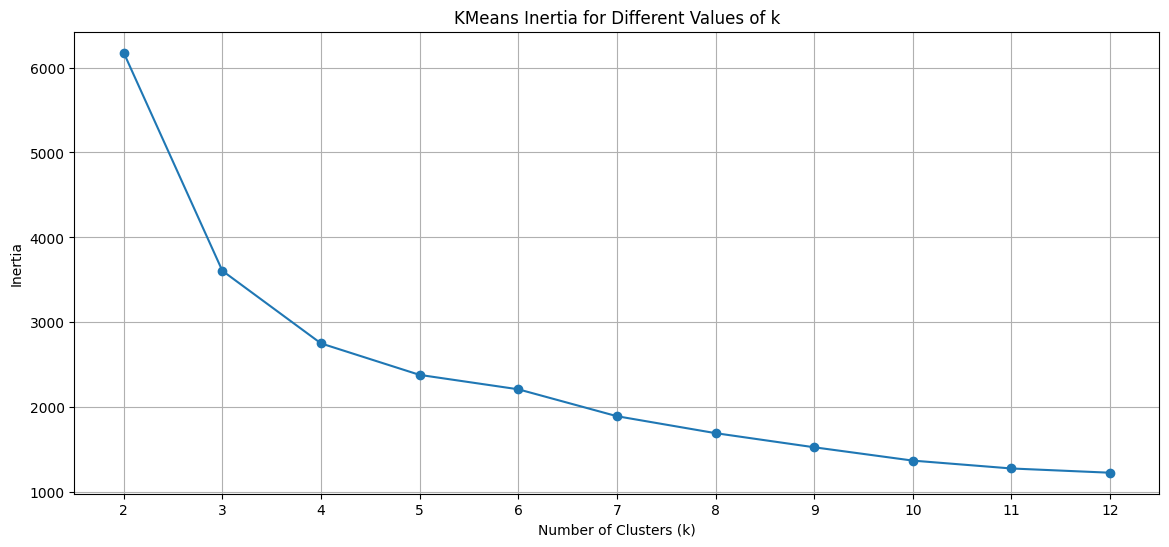

In [114]:
max_k = 12

inertia = []
k_values = range(2, max_k + 1)

for k in k_values:
    
    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=1000)
    
    kmeans.fit_predict(scaled_data_df)
    
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(14, 6))

plt.plot(k_values, inertia, marker='o')
plt.title('KMeans Inertia for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)

> Dengan menggunakan metode elbow, menurut saya ini berada di antara 4 dan 5, karena setelahnya itu, tidak ada perubahan yang besar dan performance yang berdampak. Di antara K = 4 atau 5 adalah poin stability nya

Kodingan ini adalah ritual wajib untuk menjawab pertanyaan: *"Berapa sih jumlah kelompok yang pas?"*

---

### Step 1: Menyiapkan Wadah dan Rentang K
```python
max_k = 12
inertia = []
k_values = range(2, max_k + 1)
```
*   **`max_k = 12`**: Kita mau mencoba membagi customer maksimal jadi 12 kelompok. (Bisa 15, bisa 20, tapi biasanya di atas 10 udah kebanyakan buat marketing).
*   **`inertia = []`**: Ini adalah **Keranjang Kosong**. Nanti setiap kali kita hitung skor (Inertia) untuk K tertentu, skornya kita lempar ke sini.
*   **`range(2, max_k + 1)`**: Kita akan mencoba dari **K=2** sampai **K=12**.
    *   *Kenapa mulai dari 2?* Karena kalau K=1 (semua orang jadi satu kelompok) ya gak usah dicluster dong.

---

### Step 2: Looping (Percobaan Berulang)
```python
for k in k_values:
```
Ini adalah perintah **Perulangan**. Komputer akan melakukan hal yang sama berkali-kali untuk `k = 2`, lalu `k = 3`, sampai `k = 12`.

**Apa yang dilakukan di dalam Loop?**

#### A. Membuat Robot K-Means
```python
kmeans = KMeans(n_clusters=k, random_state=42, max_iter=1000)
```
*   **`n_clusters=k`**: "Eh Robot, sekarang coba bagi datanya jadi **2** kelompok ya." (Nanti putaran berikutnya jadi 3, dst).
*   **`random_state=42`**: Ini "Kunci Jawaban". Supaya kalau kamu run ulang besok, hasilnya tetap sama (konsisten). Angka 42 itu sembarang, bisa berapa aja.
*   **`max_iter=1000`**: "Robot, kamu boleh geser-geser centroid maksimal 1000 kali. Kalau belum ketemu juga, nyerah aja." (Biar gak looping selamanya).

#### B. Melatih Robot
```python
kmeans.fit_predict(scaled_data_df)
```
*   Di sini si Robot mulai bekerja: Lempar centroid $\to$ Hitung jarak $\to$ Geser centroid.
*   Dia mempelajari pola data `scaled_data_df` kamu.

#### C. Menyimpan Skor (Raport)
```python
inertia.append(kmeans.inertia_)
```
*   **`kmeans.inertia_`**: Setelah robot selesai kerja, kita tanya: *"Gimana Bot? Seberapa rapi barisannya?"*
    *   Ingat konsep **Variance/Inertia** tadi? Semakin kecil angkanya, semakin rapi/padat klasternya.
*   **`.append(...)`**: Skor itu dimasukkan ke keranjang `inertia` yang tadi kita siapkan.

---

### Step 3: Visualisasi (Menggambar Grafik)
Bagian `plt.plot(...)` dan seterusnya itu standar menggambar grafik garis.
*   Sumbu X (`k_values`): Jumlah Kelompok (2, 3, 4...).
*   Sumbu Y (`inertia`): Skor Kerapian (Makin ke bawah makin bagus).

### Evaluasi Klaster: Silhouette Score


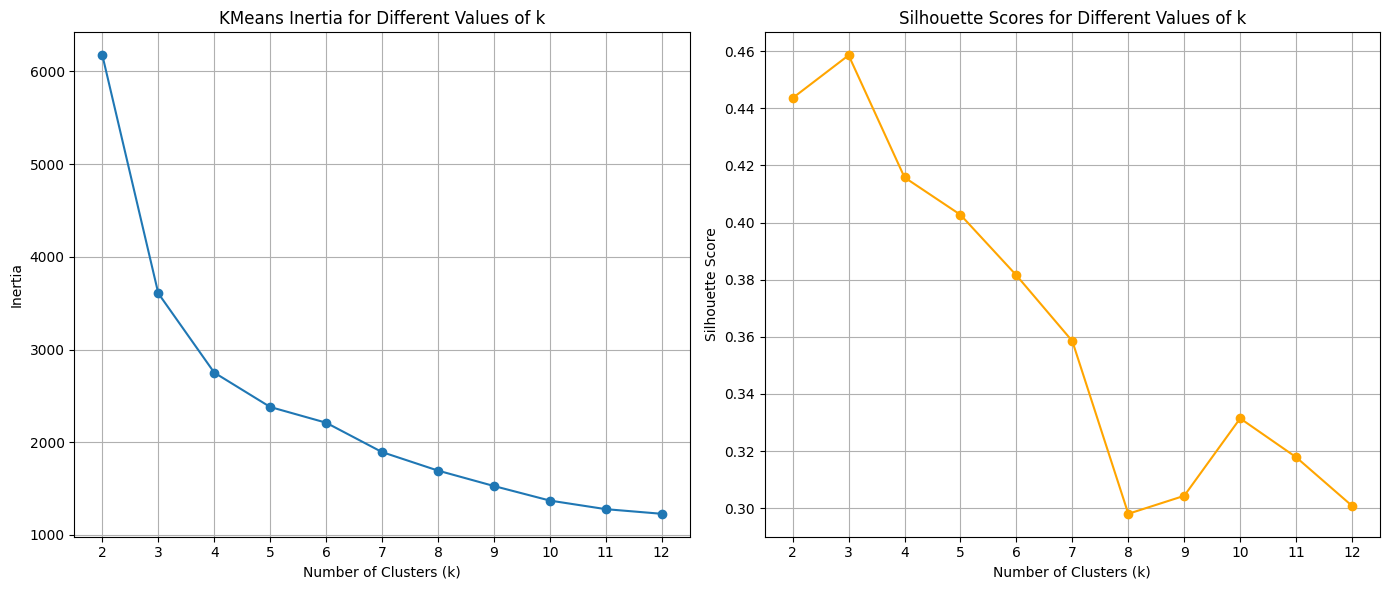

In [115]:
max_k = 12

inertia = []
silhouette_scores = []
k_values = range(2, max_k + 1)

for k in k_values:
    
    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=1000)
    
    cluester_labels = kmeans.fit_predict(scaled_data_df)
    
    sil_score = silhouette_score(scaled_data_df, cluester_labels)
    
    silhouette_scores.append(sil_score)
    
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.title('KMeans Inertia for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Scores for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)

plt.tight_layout()
plt.show()

Selain menggunakan metode Elbow (Inertia), kita juga menggunakan metrik **Silhouette Score** untuk memvalidasi kualitas klaster yang terbentuk. Metode ini memberikan ukuran seberapa baik setiap objek diklasifikasikan dengan melihat dua aspek sekaligus: **Kepadatan (Cohesion)** dan **Pemisahan (Separation)**.

### Rumus Matematis
Skor Silhouette untuk satu titik data $i$ dihitung dengan rumus:

$$ s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))} $$

**Keterangan:**
*   **$s(i)$**: Skor Silhouette (Rentang nilai: -1 sampai 1).
*   **$a(i)$**: Rata-rata jarak antara titik $i$ dengan semua titik lain **di dalam klaster yang sama** (Intra-cluster distance). *Semakin kecil $a(i)$, semakin kompak.*
*   **$b(i)$**: Rata-rata jarak antara titik $i$ dengan semua titik di **klaster tetangga terdekat** (Nearest-cluster distance). *Semakin besar $b(i)$, semakin terpisah jauh dari tetangga.*

**Interpretasi Nilai:**
*   **Mendekati +1:** Sangat Bagus. Titik data berada jauh dari klaster tetangga dan sangat dekat dengan klaster sendiri.
*   **0:** Titik data berada di perbatasan antar dua klaster (Ambigu).
*   **Negatif (-1):** Kemungkinan Salah Kamar (Misclassified). Titik data lebih dekat ke tetangga daripada ke kelompoknya sendiri.

---

### 💡 Ilustrasi Studi Kasus (Logika Perhitungan)

Mari kita bayangkan situasi di sebuah Sekolah.
*   **Siswa A** masuk di **Kelas IPA**.
*   **Kelas Tetangga** adalah **Kelas IPS**.

**1. Menghitung $a(i)$ - Jarak ke Teman Sekelas:**
*   Siswa A mengukur jarak tempat duduknya ke semua teman-teman di Kelas IPA.
*   Ternyata rata-rata jaraknya **2 meter**. (Ini $a(i)$).
*   *Artinya:* Dia duduk cukup kumpul dengan teman sekelasnya.

**2. Menghitung $b(i)$ - Jarak ke Kelas Sebelah:**
*   Siswa A mengukur jarak tempat duduknya ke semua murid di Kelas IPS (Tetangga terdekat).
*   Ternyata rata-rata jaraknya **10 meter**. (Ini $b(i)$).
*   *Artinya:* Dia duduk jauh dari anak-anak IPS.

**3. Menghitung Skor Silhouette:**
$$ s(i) = \frac{10 - 2}{\max(2, 10)} = \frac{8}{10} = \mathbf{0.8} $$

**Kesimpulan:**
Skor **0.8** (Mendekati 1) berarti Siswa A sudah berada di posisi yang **SANGAT TEPAT**. Dia sangat dekat dengan teman sekelasnya (IPA) dan sangat jauh dari anak kelas sebelah (IPS). Klasterisasinya valid.

*   **Mendekati +1 (Bagus Banget):** Clusternya kompak dan terpisah jauh dari cluster lain. (Bayangkan pulau-pulau yang terpisah lautan luas).
*   **Sekitar 0 (Biasa Aja):** Clusternya mepet-mepet atau tumpang tindih (*overlap*). (Bayangkan perbatasan desa yang rumahnya nyambung).
*   **Mendekati -1 (Jelek/Salah):** Datanya nyasar. Dia masuk Cluster A padahal lebih dekat ke Cluster B.

Jadi nanti kalau kita jalankan kode Silhouette Score, kita cari nilai K yang skor rata-ratanya **paling tinggi (paling dekat ke 1)**.

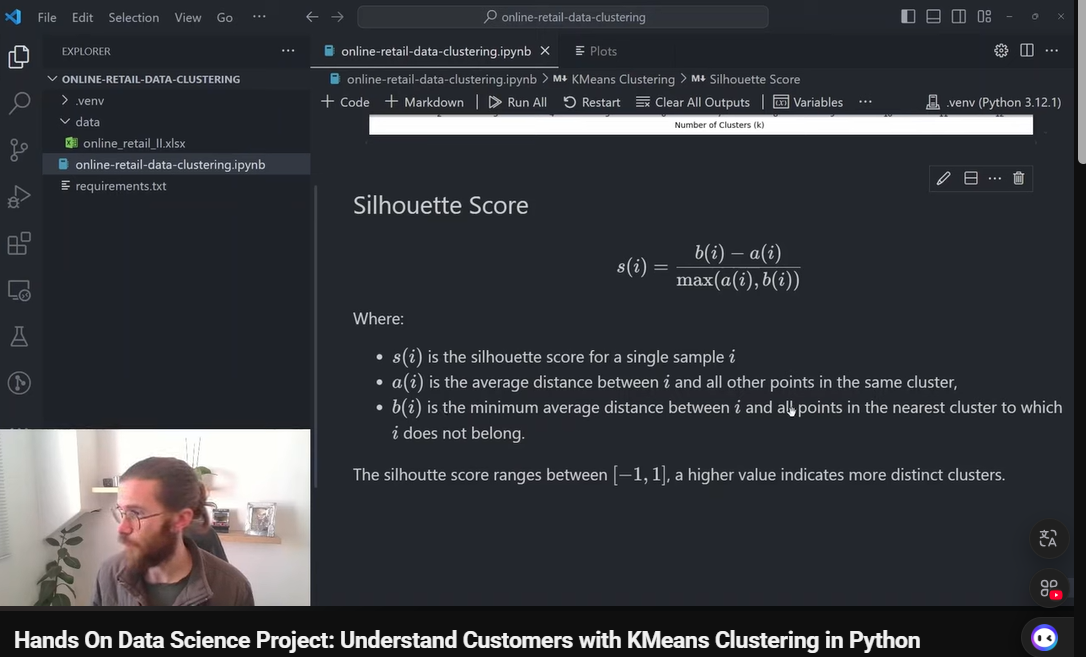

In [116]:
kmeans = KMeans(n_clusters=4, random_state=42, max_iter=1000)

cluster_labels = kmeans.fit_predict(scaled_data_df)

cluster_labels

array([1, 0, 2, ..., 1, 0, 0], shape=(3809,), dtype=int32)

In [117]:
non_outliers_df["Cluster"] = cluster_labels

non_outliers_df

C:\Users\MSI KATANA 15\AppData\Local\Temp\ipykernel_23292\3577770544.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_outliers_df["Cluster"] = cluster_labels


,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
0,12346.00,169.36,2,2010-06-28 13:53:00,164,1
1,12347.00,1323.32,2,2010-12-07 14:57:00,2,0
2,12348.00,221.16,1,2010-09-27 14:59:00,73,2
3,12349.00,2221.14,2,2010-10-28 08:23:00,42,0
4,12351.00,300.93,1,2010-11-29 15:23:00,10,2
...,...,...,...,...,...,...
4280,18283.00,641.77,6,2010-11-22 15:30:00,17,0
4281,18284.00,411.68,1,2010-10-04 11:33:00,66,2
4282,18285.00,377.00,1,2010-02-17 10:24:00,295,1
4283,18286.00,1246.43,2,2010-08-20 11:57:00,111,0


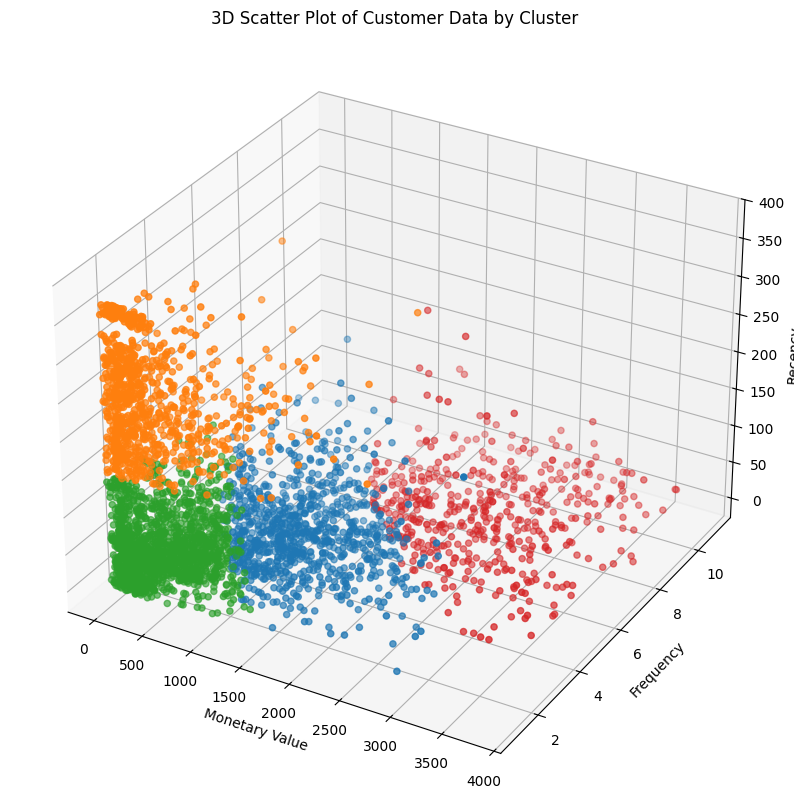

In [118]:
cluster_colors = {0: '#1f77b4',  # Blue
                  1: '#ff7f0e',  # Orange
                  2: '#2ca02c',  # Green
                  3: '#d62728'}  # Red

colors = non_outliers_df['Cluster'].map(cluster_colors)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(non_outliers_df['MonetaryValue'],
                     non_outliers_df['Frequency'],
                     non_outliers_df['Recency'],
                     c=colors,  # Use mapped solid colors
                     marker='o')

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data by Cluster')

plt.show()

Mari kita bongkar proses pembentukan klaster dan visualisasinya langkah demi langkah. Ini adalah tahap di mana data kamu akhirnya "dikasih label".

---

### Langkah 1: Membentuk Pasukan Robot K-Means
```python
kmeans = KMeans(n_clusters=4, random_state=42, max_iter=1000)
```
*   **`KMeans(...)`**: Memanggil arsitek K-Means.
*   **`n_clusters=4`**: Kamu memberi perintah tegas: *"Saya sudah putuskan, bagi data ini jadi **4 Kelompok** saja!"* (Hasil keputusan dari Elbow & Silhouette tadi).
*   **`random_state=42`**: Kunci biar hasilnya konsisten (kalau dijalankan ulang, orang yang masuk Kelompok A tetap di A).
*   **`max_iter=1000`**: Memberi batas waktu berpikir biar komputer gak *hang* kalau datanya rumit.

### Langkah 2: Melatih & Memprediksi (Fit & Predict)
```python
cluster_labels = kmeans.fit_predict(scaled_data_df)
```
*   **`scaled_data_df`**: Ingat, kita pakai data yang **SUDAH DI-SCALING** (yang angkanya -1 sampai 3 tadi), bukan data asli yang ribuan.
*   **`fit`**: Robot mempelajari pola sebaran datanya.
*   **`predict`**: Robot menunjuk satu-satu:
    *   "Kamu Customer 1, masuk Kelompok 0!"
    *   "Kamu Customer 2, masuk Kelompok 2!"
*   **Output `cluster_labels`**: Ini adalah list angka `[1, 0, 2, 1, 0...]` yang isinya nomor kelompok masing-masing customer.

### Langkah 3: Menempelkan Label ke Data Asli
```python
non_outliers_df["Cluster"] = cluster_labels
```
*   Ini langkah penting! Kita ambil label hasil prediksi tadi, lalu kita tempelkan balik ke tabel **Data Asli (Non-Scaled)**.
*   **Kenapa ke data asli?** Karena kita mau baca profilnya pakai angka manusia (Rupiah/Dolar), bukan angka Z-Score (-0.5).
*   *Hasil:* Di tabel `non_outliers_df`, sekarang ada kolom baru bernama `Cluster`.

### Langkah 4: Persiapan Warna-Warni
```python
cluster_colors = {0: '#1f77b4', 1: '#ff7f0e', 2: '#2ca02c', 3: '#d62728'}
colors = non_outliers_df['Cluster'].map(cluster_colors)
```
*   Kita bikin kamus warna manual biar konsisten.
    *   Kelompok 0 = Biru
    *   Kelompok 1 = Oranye
    *   Kelompok 2 = Hijau
    *   Kelompok 3 = Merah
*   `.map(...)`: Menerjemahkan kolom `Cluster` (angka 0,1,2,3) menjadi kode warna Hex.

### Langkah 5: Menggambar Plot 3D
```python
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(non_outliers_df['MonetaryValue'], ..., c=colors, marker='o')
```
*   Ini sama persis kayak kode plot 3D sebelumnya.
*   Bedanya cuma satu: parameter **`c=colors`**.
*   Artinya: "Warnai setiap titik sesuai dengan warna kelompoknya masing-masing."

---

**Hasilnya:**
Kamu mendapatkan visualisasi di mana customer yang "mirip" (satu kelompok) warnanya sama dan posisinya bergerombol.

Jelas alurnya? Dari data mentah $\to$ Scaling $\to$ K-Means Prediksi $\to$ Tempel Label $\to$ Gambar.